In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

In [3]:
df = pd.read_csv('Book1.csv')
df

,Date,1,2,3,4,5,6,7,8,9,...,7723955,30369354,34703847,36200067,36671067,37052366,38834077,39168240,39379024,Grand Total
0,22-Mar,NaN,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92
1,23-Mar,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85
2,24-Mar,208.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126
3,25-Mar,68.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
4,26-Mar,46.0,48.0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,3-Oct,NaN,47.0,NaN,NaN,26.0,28.0,74.0,NaN,25.0,...,NaN,30.0,NaN,67.0,39.0,28.0,27.0,116.0,34.0,42
1287,4-Oct,NaN,30.0,NaN,NaN,18.0,21.0,104.0,NaN,21.0,...,NaN,25.0,6.0,40.0,30.0,28.0,23.0,61.0,NaN,32
1288,5-Oct,NaN,30.0,NaN,NaN,17.0,20.0,75.0,NaN,18.0,...,NaN,24.0,NaN,37.0,29.0,23.0,20.0,67.0,NaN,31
1289,6-Oct,NaN,26.0,NaN,NaN,13.0,18.0,35.0,NaN,18.0,...,NaN,22.0,NaN,26.0,26.0,23.0,19.0,34.0,NaN,24


In [4]:
df['Date'] = pd.date_range(start='2017-03-22', periods= len(df), freq='D')

In [5]:
df.set_index('Date', inplace=True)

In [6]:
df

,1,2,3,4,5,6,7,8,9,10,...,7723955,30369354,34703847,36200067,36671067,37052366,38834077,39168240,39379024,Grand Total
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-22,NaN,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92
2017-03-23,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85
2017-03-24,208.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126
2017-03-25,68.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
2017-03-26,46.0,48.0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-28,NaN,47.0,NaN,NaN,26.0,28.0,74.0,NaN,25.0,NaN,...,NaN,30.0,NaN,67.0,39.0,28.0,27.0,116.0,34.0,42
2020-09-29,NaN,30.0,NaN,NaN,18.0,21.0,104.0,NaN,21.0,NaN,...,NaN,25.0,6.0,40.0,30.0,28.0,23.0,61.0,NaN,32
2020-09-30,NaN,30.0,NaN,NaN,17.0,20.0,75.0,NaN,18.0,NaN,...,NaN,24.0,NaN,37.0,29.0,23.0,20.0,67.0,NaN,31


In [7]:
missing_data = df.drop(columns=['Grand Total']).isna().mean()
stable_sensors = missing_data[missing_data<0.10].index.tolist()
print(f'stable sensors are {stable_sensors}')

stable sensors are ['2', '5', '6', '9', '12']


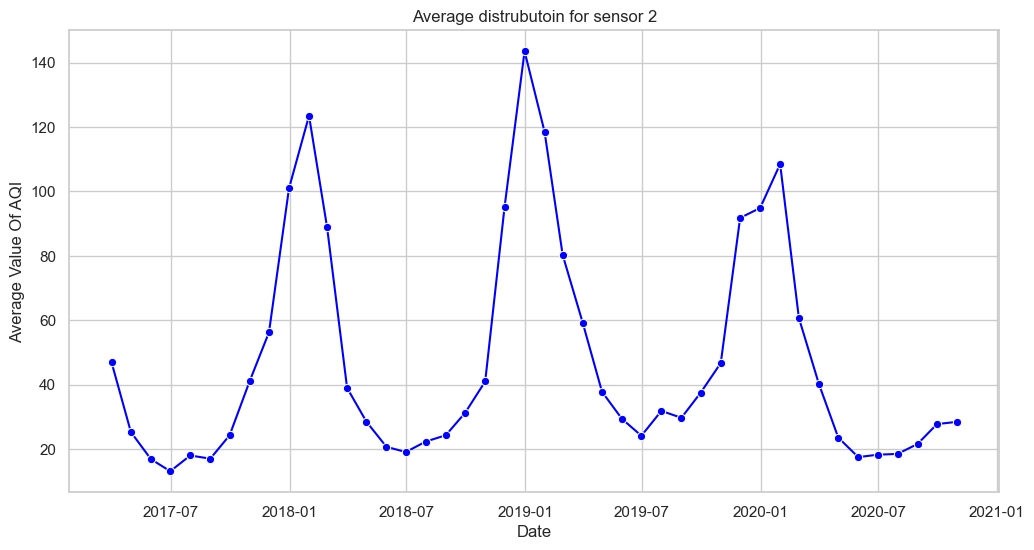

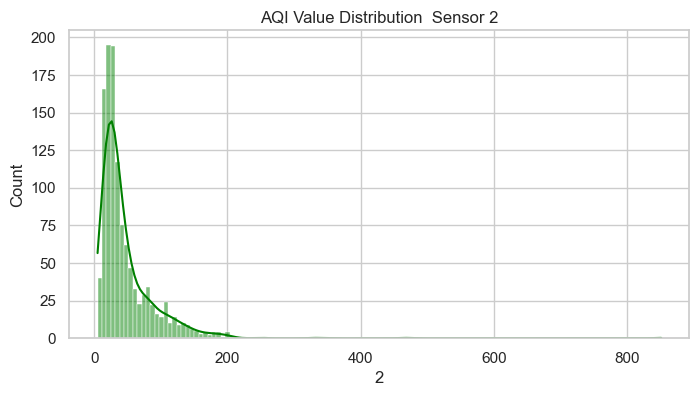

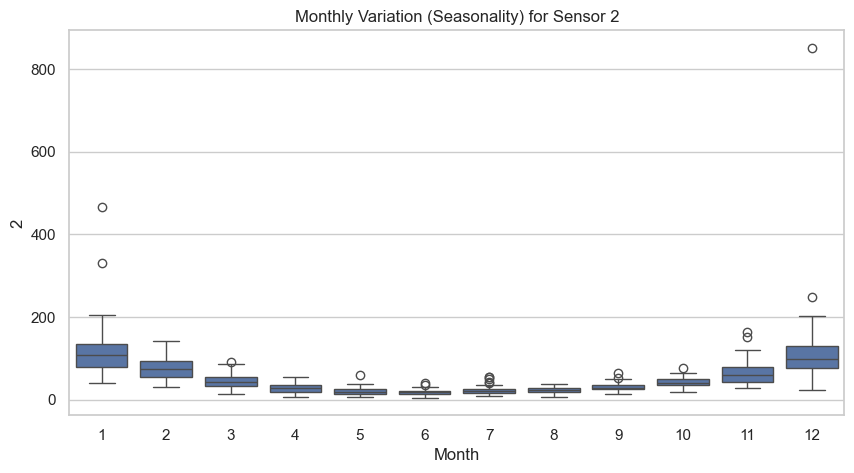

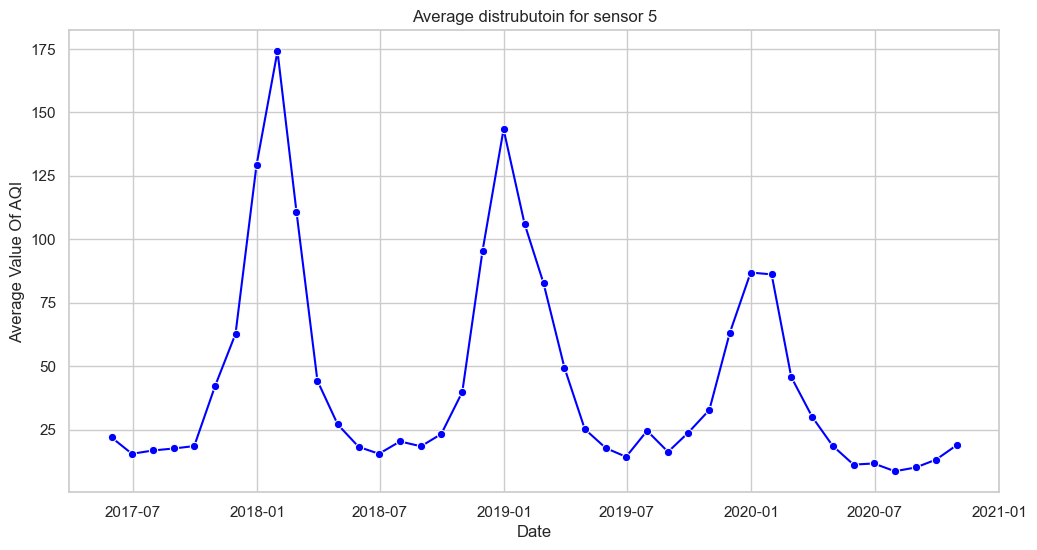

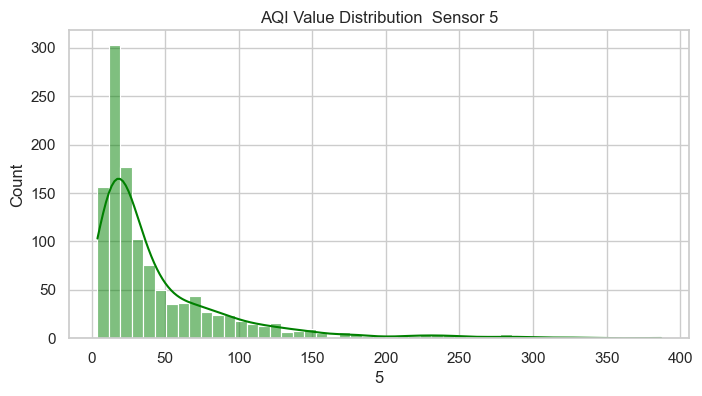

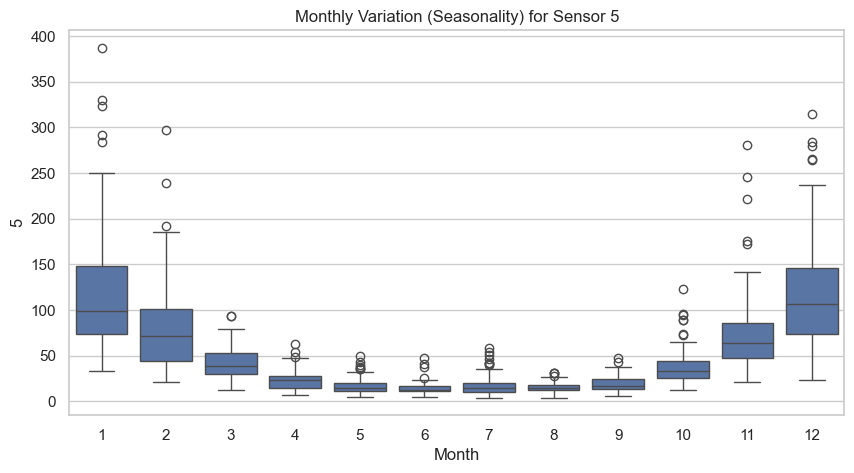

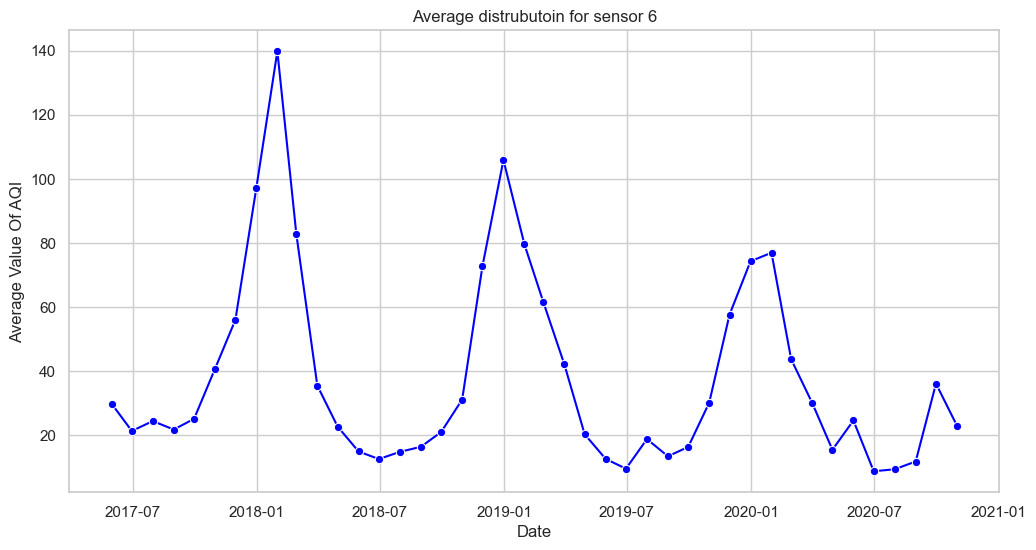

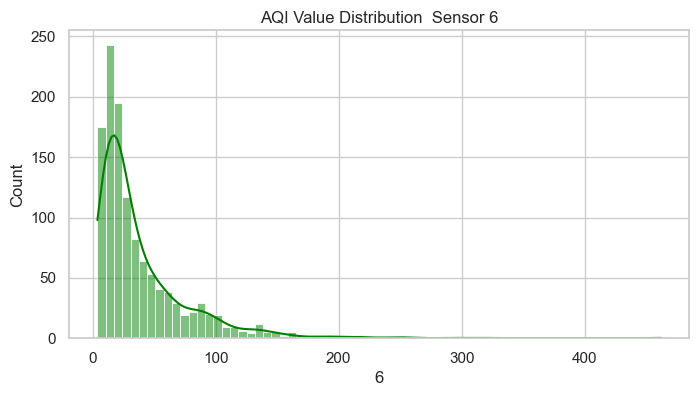

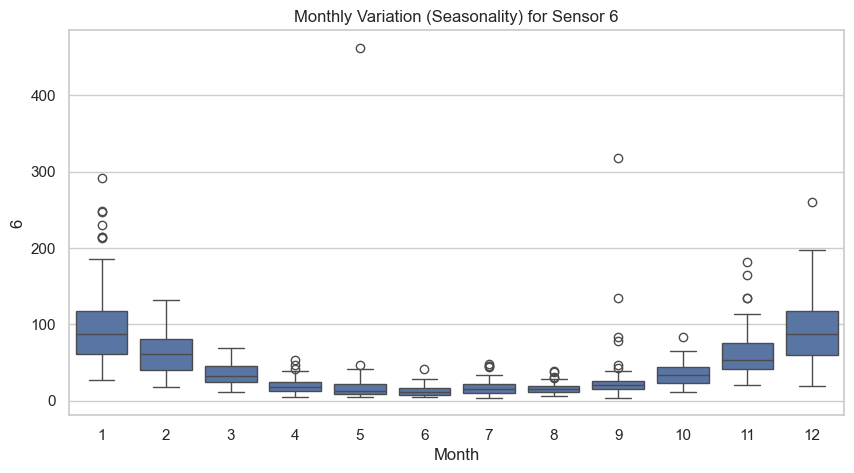

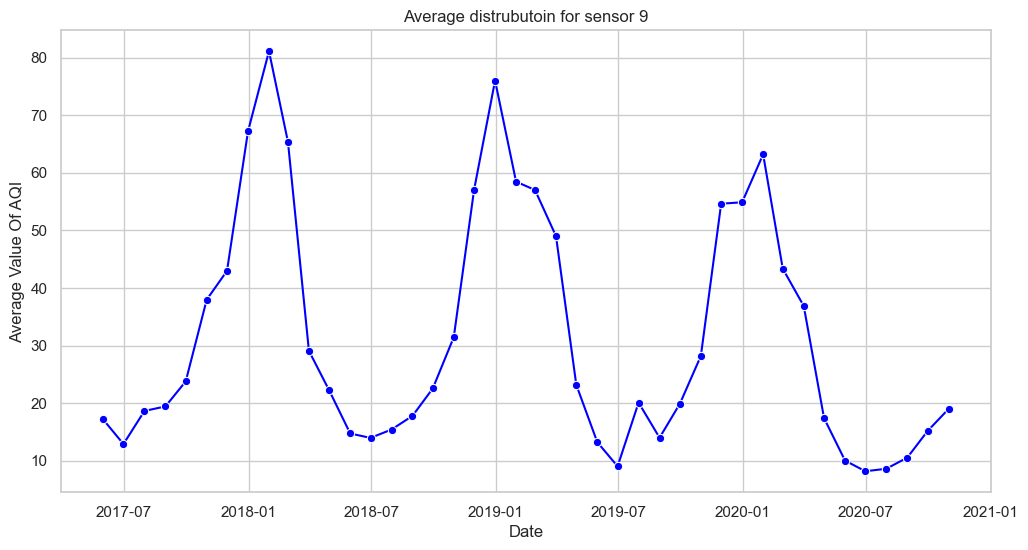

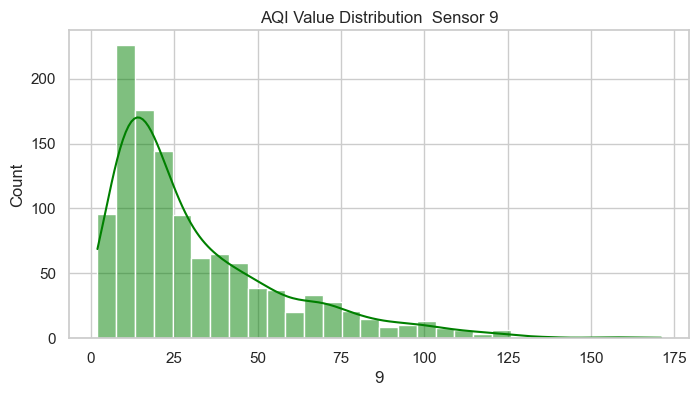

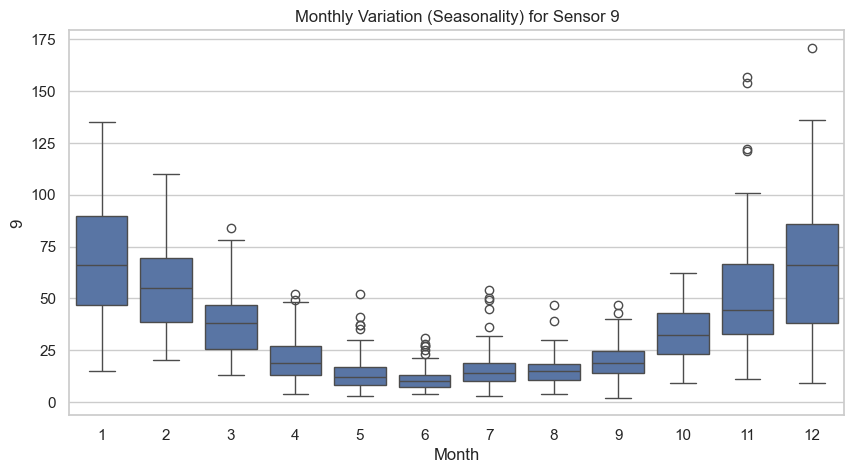

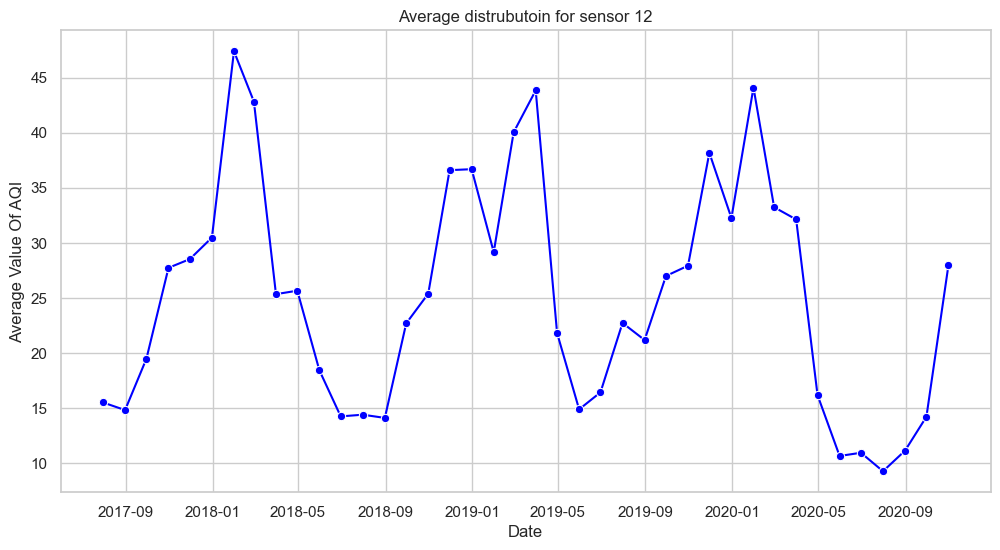

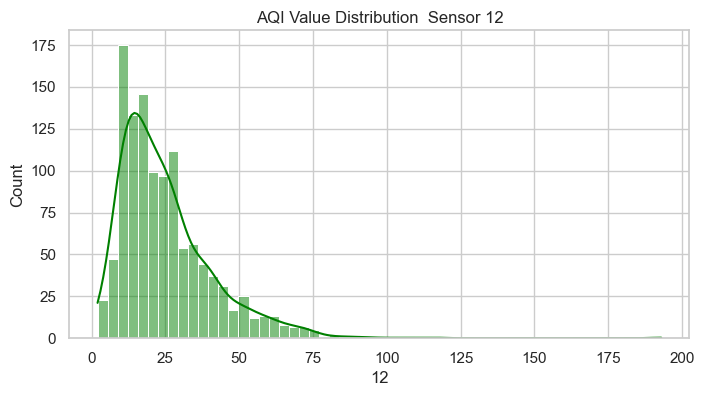

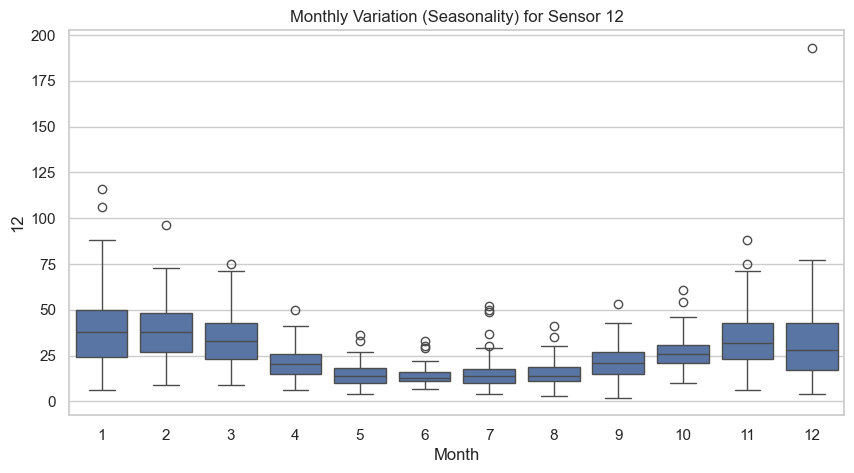

In [8]:
sns.set(style="whitegrid")
for sensor in stable_sensors:

    df_clean = df.dropna(subset=[sensor])
    df_resampled = df_clean[sensor].resample('ME').mean()


    '''monthly_aqi = df_clean.resample('ME').sum()

    plt.figure(figsize=(10, 6))
    plt.plot(monthly_aqi[sensor], c='red')
    plt.title("Monthly AQI")
    plt.xlabel("Date")
    plt.ylabel("AQI")'''


    plt.figure(figsize=(12, 6))
    # Plot the resampled data
    sns.lineplot(data=df_resampled, color='blue', marker='o')

    plt.title(f'Average distrubutoin for sensor {sensor}')
    plt.xlabel('Date')
    plt.ylabel('Average Value Of AQI')

    #distrubution 
    plt.figure(figsize=(8, 4))
    sns.histplot(df_clean[sensor], kde=True, color='green')
    plt.title(f'AQI Value Distribution  Sensor {sensor}')

    #boxplot 
    temp_df = df_clean[[sensor]].copy()
    temp_df['Month'] = temp_df.index.month

    plt.figure(figsize=(10, 5))
    sns.boxplot(data=temp_df, x='Month', y=sensor)
    plt.title(f'Monthly Variation (Seasonality) for Sensor {sensor}')

    plt.show()

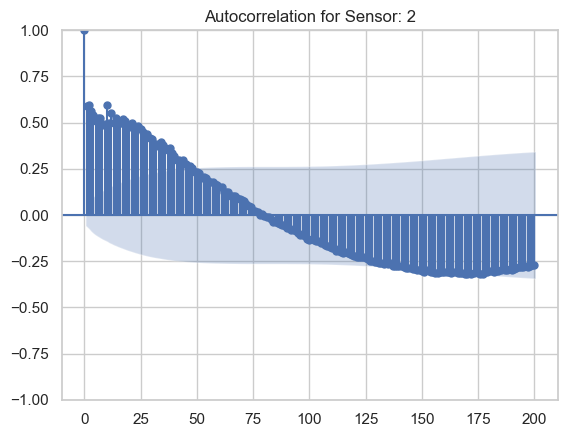

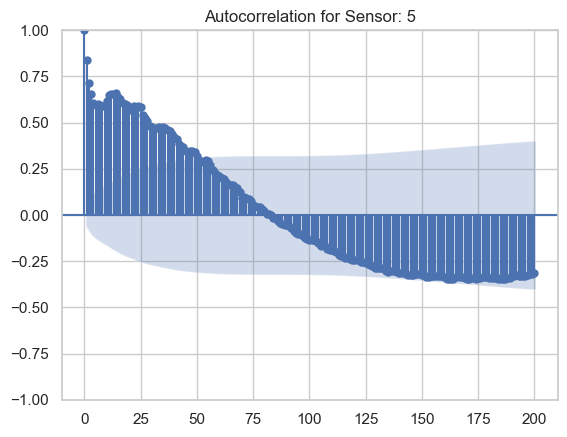

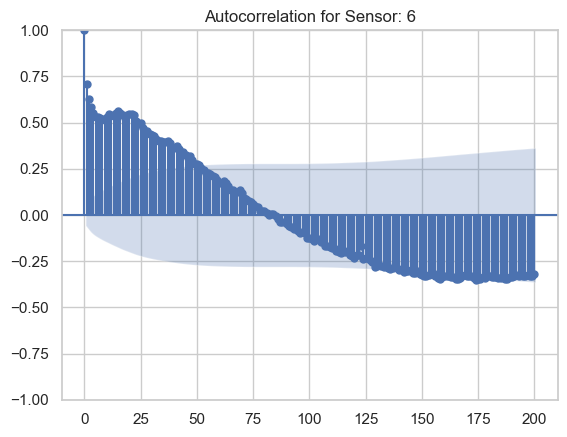

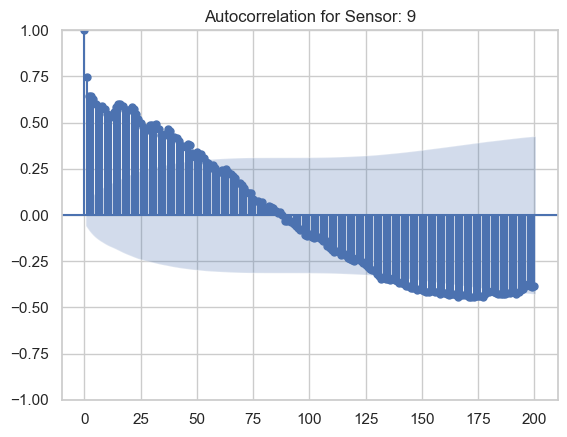

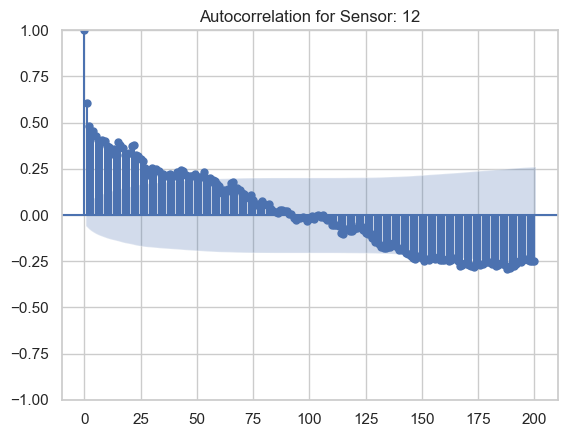

In [9]:
for sensor in stable_sensors:
    sensor_data = df[sensor].dropna()
    plot_acf(sensor_data, lags=200)
    plt.title(f"Autocorrelation for Sensor: {sensor}")
    plt.show()

## The ACF plot exhibits a sinusoidal decay, which indicates strong seasonal periodicity in the AQI levels. This suggests that the data does not just depend on the immediate past, but repeats a structural pattern over a specific cycle (e.g., annual or daily

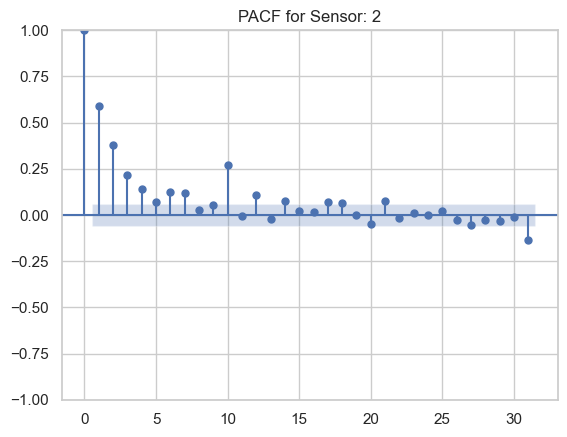

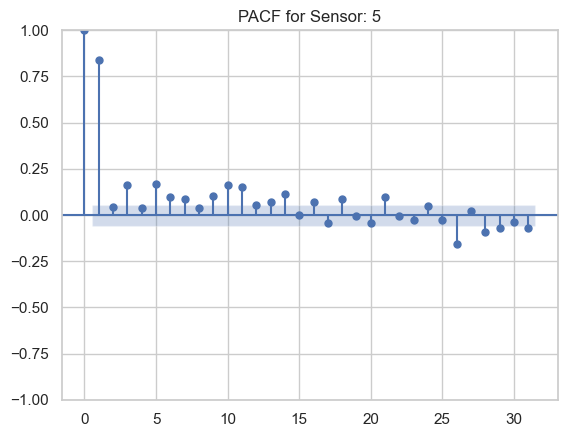

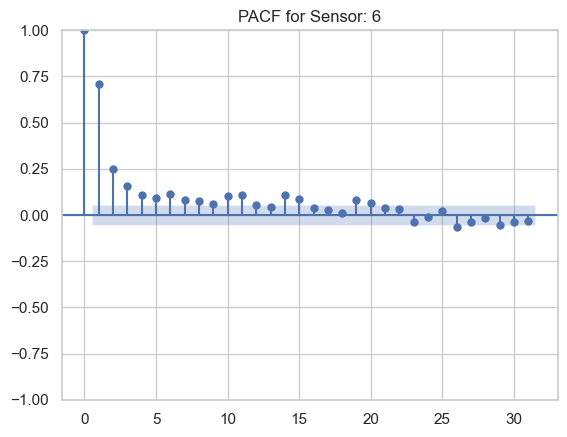

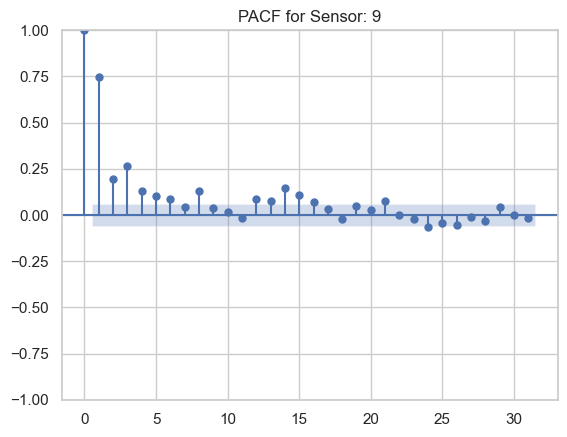

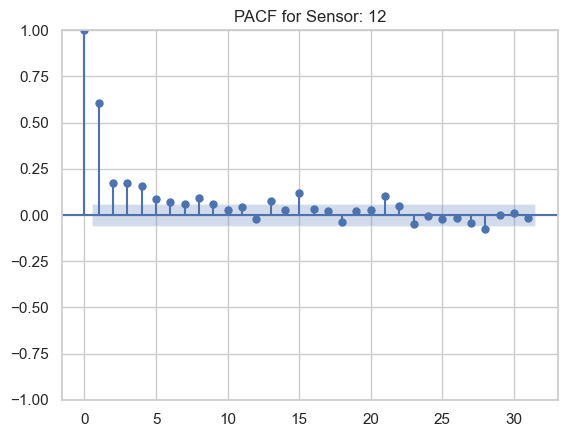

In [10]:
for sensor in stable_sensors:
    sensor_data = df[sensor].dropna()
    plot_pacf(sensor_data)
    plt.title(f"PACF for Sensor: {sensor}")
    plt.show()

## in this plots we can see "AR" (AutoRegressive) and based of plot we can start from lags 1, 2

--- Errors for Sensor 2 ---
MAE:  6.86 (Average error in AQI points)
RMSE: 12.05 (Penalizes big mistakes)
MAPE: 13.62% (Average percentage error)
--------------------------------------


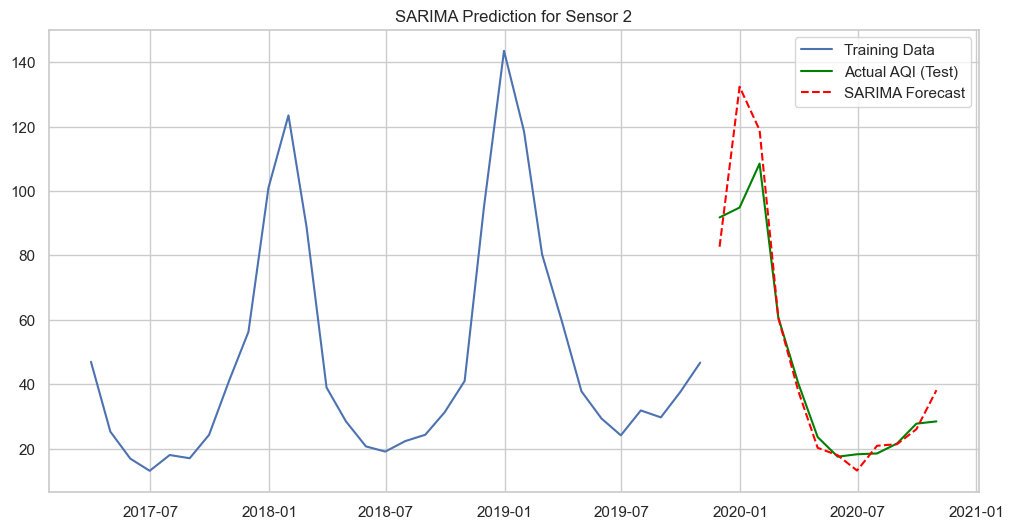

--- Errors for Sensor 5 ---
MAE:  7.95 (Average error in AQI points)
RMSE: 10.26 (Penalizes big mistakes)
MAPE: 31.98% (Average percentage error)
--------------------------------------


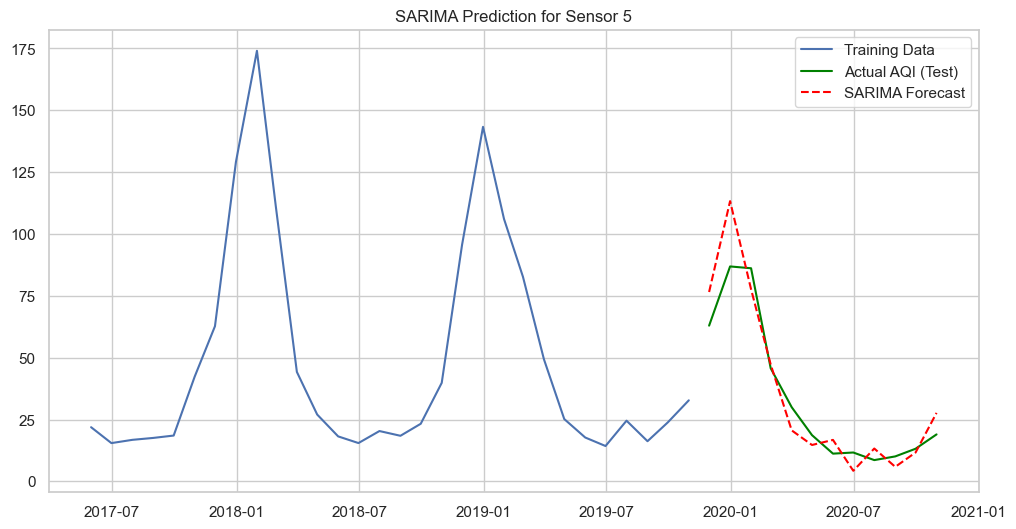

--- Errors for Sensor 6 ---
MAE:  7.41 (Average error in AQI points)
RMSE: 8.83 (Penalizes big mistakes)
MAPE: 35.37% (Average percentage error)
--------------------------------------


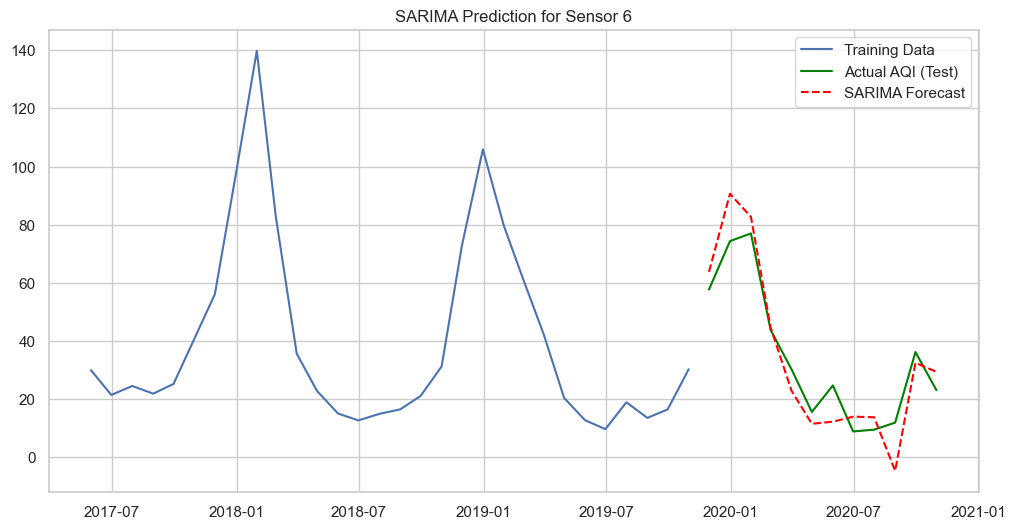

--- Errors for Sensor 9 ---
MAE:  3.95 (Average error in AQI points)
RMSE: 5.00 (Penalizes big mistakes)
MAPE: 18.25% (Average percentage error)
--------------------------------------


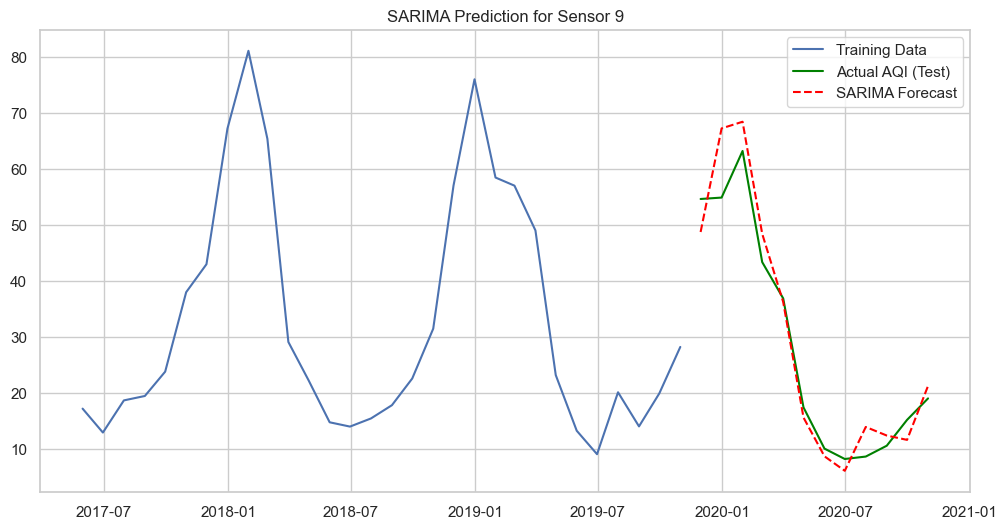

--- Errors for Sensor 12 ---
MAE:  2.63 (Average error in AQI points)
RMSE: 3.55 (Penalizes big mistakes)
MAPE: 14.94% (Average percentage error)
--------------------------------------


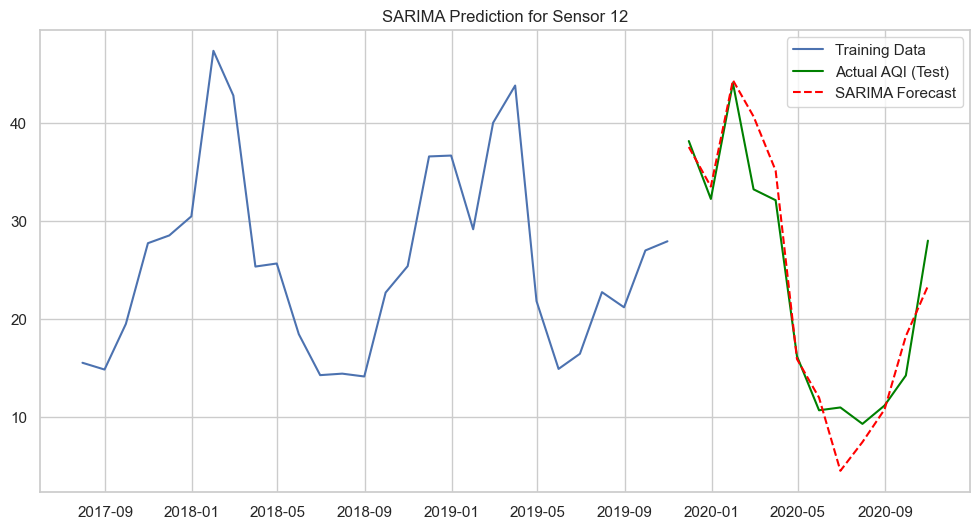

In [11]:
for sensor in stable_sensors:
    df_clean = df.dropna(subset=[sensor])
    df_resampled = df_clean[sensor].resample('ME').mean()

    # 1. Use your resampled monthly data (it's cleaner for SARIMA)
    data = df_resampled 

    # 2. Split: Train on everything EXCEPT the last 12 months, Test on last 12 months
    train_data = data.iloc[:-12]
    test_data = data.iloc[-12:]

    from statsmodels.tsa.statespace.sarimax import SARIMAX

    model = SARIMAX(df_resampled, 
                order=(2, 1, 3),              # (p, d, q)
                seasonal_order=(1, 1, 0, 12), # (P, D, Q, s)
                enforce_stationarity=False,
                enforce_invertibility=False)
    # 4. Train
    results = model.fit()

    # 5. Predict the future (the size of your test set)
    # start = end of training, end = end of testing
    prediction = results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

    # Fix the index so it plots correctly
    prediction.index = test_data.index
    from sklearn.metrics import mean_absolute_error, mean_squared_error


    # 1. Calculate the numeric errors
    mae = mean_absolute_error(test_data, prediction)
    rmse = np.sqrt(mean_squared_error(test_data, prediction))

    # 2. Calculate the percentage error (MAPE) manually
    # (abs(Actual - Predicted) / Actual) * 100
    mape = np.mean(np.abs((test_data - prediction) / test_data)) * 100

    # 3. Print them clearly
    print(f"--- Errors for Sensor {sensor} ---")
    print(f"MAE:  {mae:.2f} (Average error in AQI points)")
    print(f"RMSE: {rmse:.2f} (Penalizes big mistakes)")
    print(f"MAPE: {mape:.2f}% (Average percentage error)")
    print("--------------------------------------")

    # 6. Plot
    plt.figure(figsize=(12, 6))
    plt.plot(train_data, label='Training Data')
    plt.plot(test_data, label='Actual AQI (Test)', color='green')
    plt.plot(prediction, label='SARIMA Forecast', color='red', linestyle='--')
    plt.legend()
    plt.title(f'SARIMA Prediction for Sensor {sensor}')
    plt.show()

--- Errors for Sensor 2 ---
MAE:  2809.61 (Average error in AQI points)
RMSE: 4862.44 (Penalizes big mistakes)
MAPE: 11046.37% (Average percentage error)
--------------------------------------


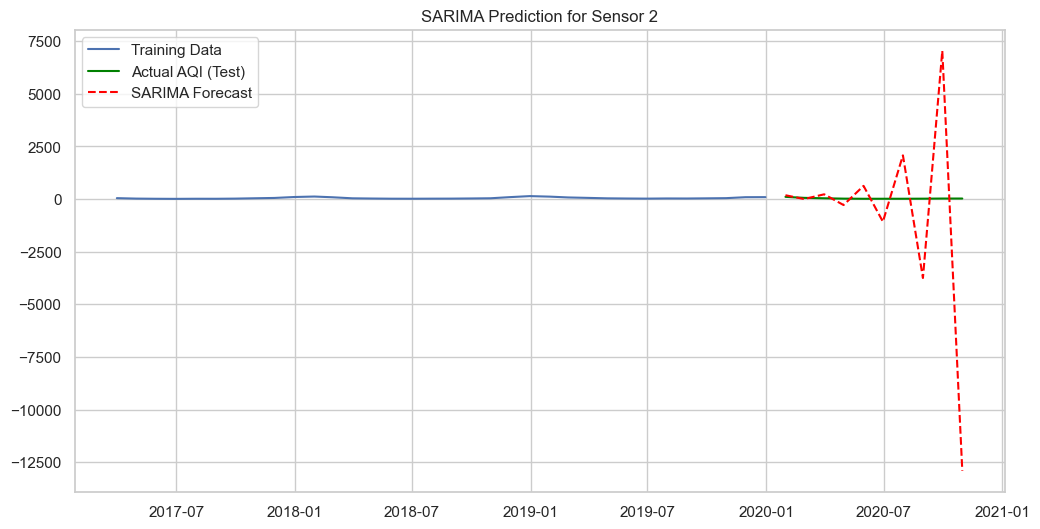

--- Errors for Sensor 5 ---
MAE:  2543.82 (Average error in AQI points)
RMSE: 4043.13 (Penalizes big mistakes)
MAPE: 18593.64% (Average percentage error)
--------------------------------------


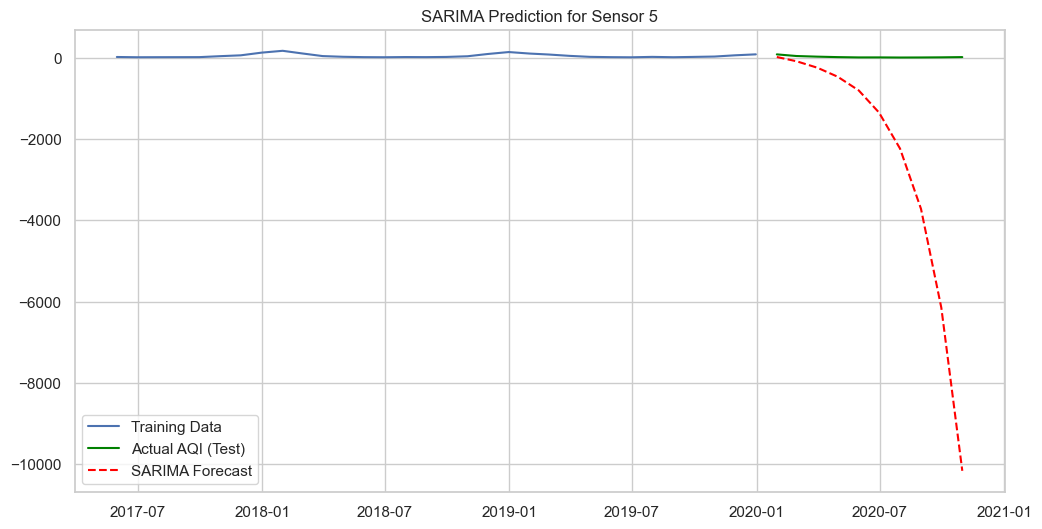

--- Errors for Sensor 6 ---
MAE:  34.47 (Average error in AQI points)
RMSE: 36.22 (Penalizes big mistakes)
MAPE: 191.39% (Average percentage error)
--------------------------------------


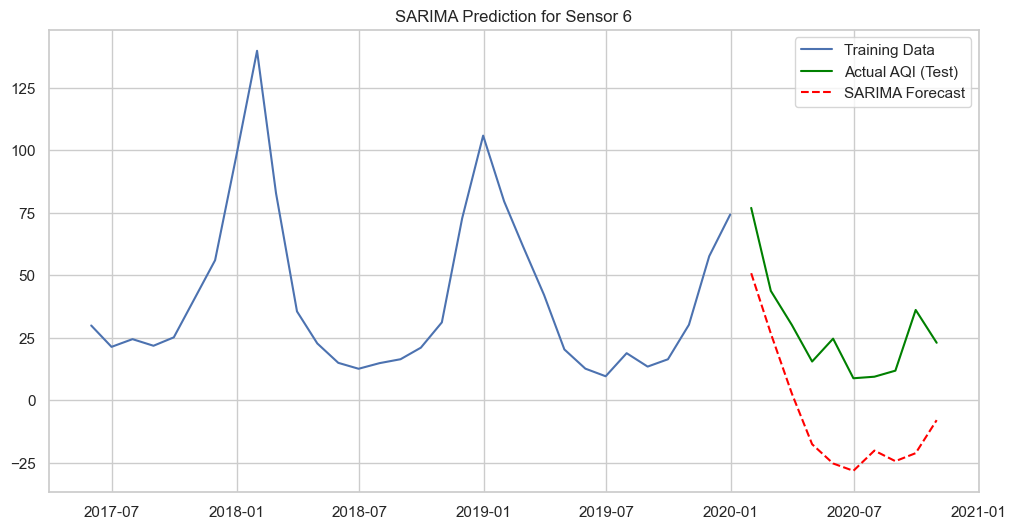

--- Errors for Sensor 9 ---
MAE:  48.84 (Average error in AQI points)
RMSE: 57.67 (Penalizes big mistakes)
MAPE: 375.67% (Average percentage error)
--------------------------------------


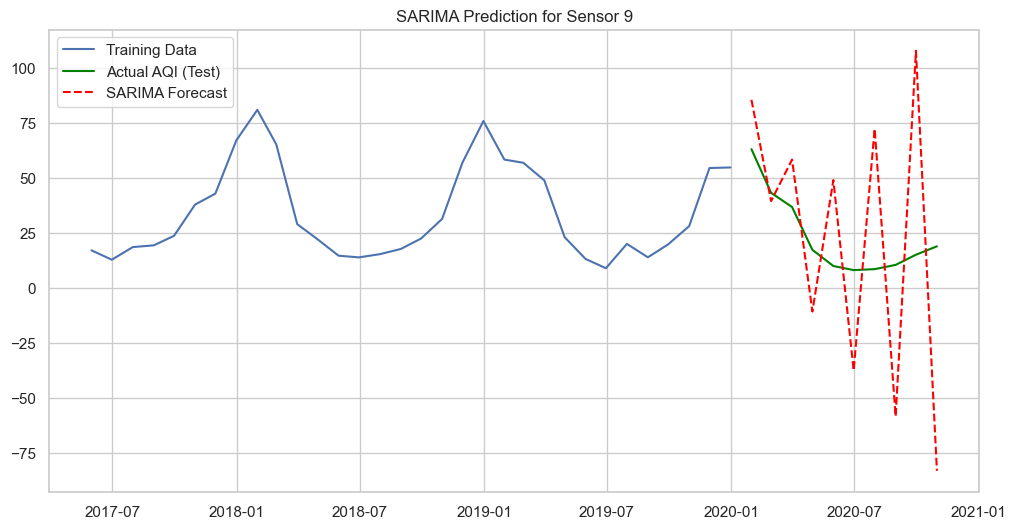

--- Errors for Sensor 12 ---
MAE:  121.15 (Average error in AQI points)
RMSE: 155.33 (Penalizes big mistakes)
MAPE: 828.02% (Average percentage error)
--------------------------------------


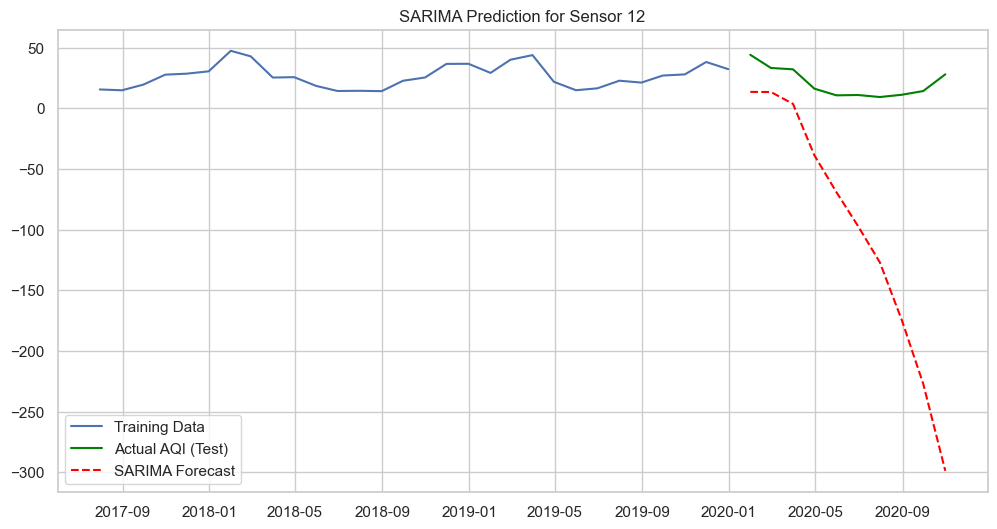

In [18]:
for sensor in stable_sensors:
    df_clean = df.dropna(subset=[sensor])
    df_resampled = df_clean[sensor].resample('ME').mean()

    # 1. Use your resampled monthly data (it's cleaner for SARIMA)
    data = df_resampled 

    # 2. Split: Train on everything EXCEPT the last 12 months, Test on last 12 months
    train_data = data.iloc[:-10]
    test_data = data.iloc[-10:]

    from statsmodels.tsa.statespace.sarimax import SARIMAX

    model = SARIMAX(train_data, 
                order=(1, 1, 1),              # (p, d, q)
                seasonal_order=(1, 1, 0, 12), # (P, D, Q, s)
                enforce_stationarity=False,
                enforce_invertibility=False)
    # 4. Train
    results = model.fit()

    # 5. Predict the future (the size of your test set)
    # start = end of training, end = end of testing

    forecast_object = results.get_forecast(steps=len(test_data))

    prediction = forecast_object.predicted_mean

    prediction.index = test_data.index # Assign dates
    
    from sklearn.metrics import mean_absolute_error, mean_squared_error


    # 1. Calculate the numeric errors
    mae = mean_absolute_error(test_data, prediction)
    rmse = np.sqrt(mean_squared_error(test_data, prediction))

    # 2. Calculate the percentage error (MAPE) manually
    # (abs(Actual - Predicted) / Actual) * 100
    mape = np.mean(np.abs((test_data - prediction) / test_data)) * 100

    # 3. Print them clearly
    print(f"--- Errors for Sensor {sensor} ---")
    print(f"MAE:  {mae:.2f} (Average error in AQI points)")
    print(f"RMSE: {rmse:.2f} (Penalizes big mistakes)")
    print(f"MAPE: {mape:.2f}% (Average percentage error)")
    print("--------------------------------------")

    # 6. Plot
    plt.figure(figsize=(12, 6))
    plt.plot(train_data, label='Training Data')
    plt.plot(test_data, label='Actual AQI (Test)', color='green')
    plt.plot(prediction, label='SARIMA Forecast', color='red', linestyle='--')
    plt.legend()
    plt.title(f'SARIMA Prediction for Sensor {sensor}')
    plt.show()


Processing Sensor: 2
Train data: 32 months
Test data: 12 months

Searching for best parameters (this may take a few minutes)...

✅ Best SARIMA parameters found:
   Order: (2, 0, 2)
   Seasonal: (0, 1, 1, 12)
   AIC: -21.47

📊 Model Performance:
   MAE:  17.00 AQI points
   RMSE: 19.86
   MAPE: 48.96%


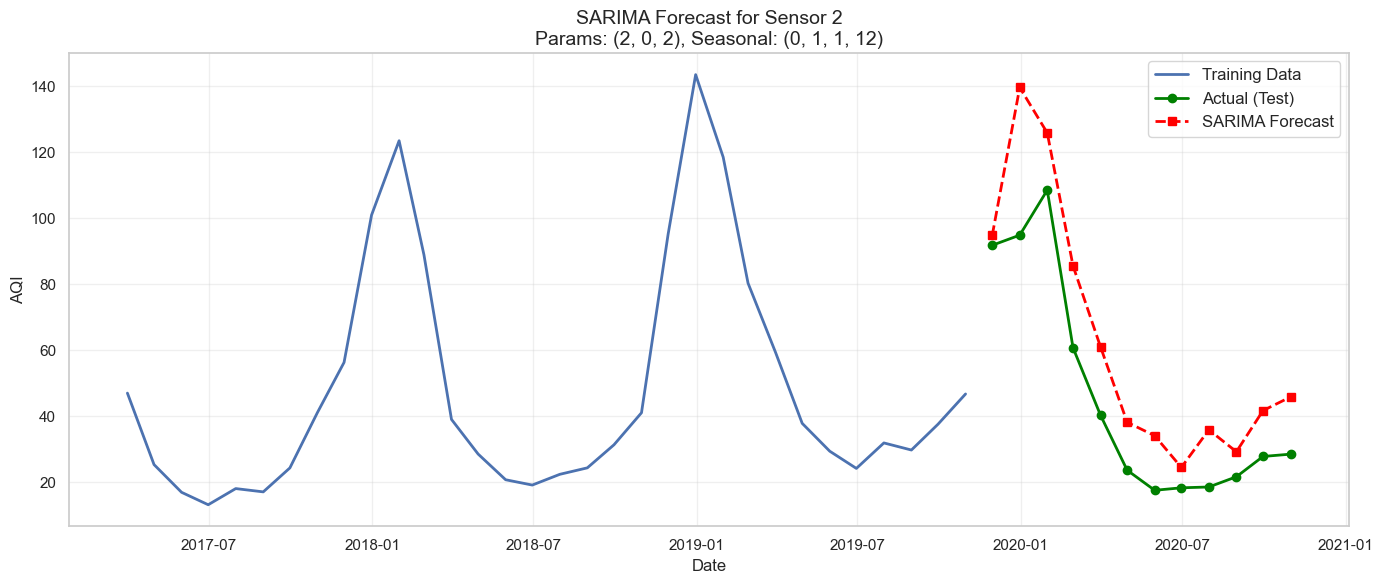


Processing Sensor: 5
Train data: 30 months
Test data: 12 months

Searching for best parameters (this may take a few minutes)...

✅ Best SARIMA parameters found:
   Order: (1, 1, 2)
   Seasonal: (1, 1, 1, 12)
   AIC: -3.20

📊 Model Performance:
   MAE:  21.16 AQI points
   RMSE: 33.96
   MAPE: 55.59%


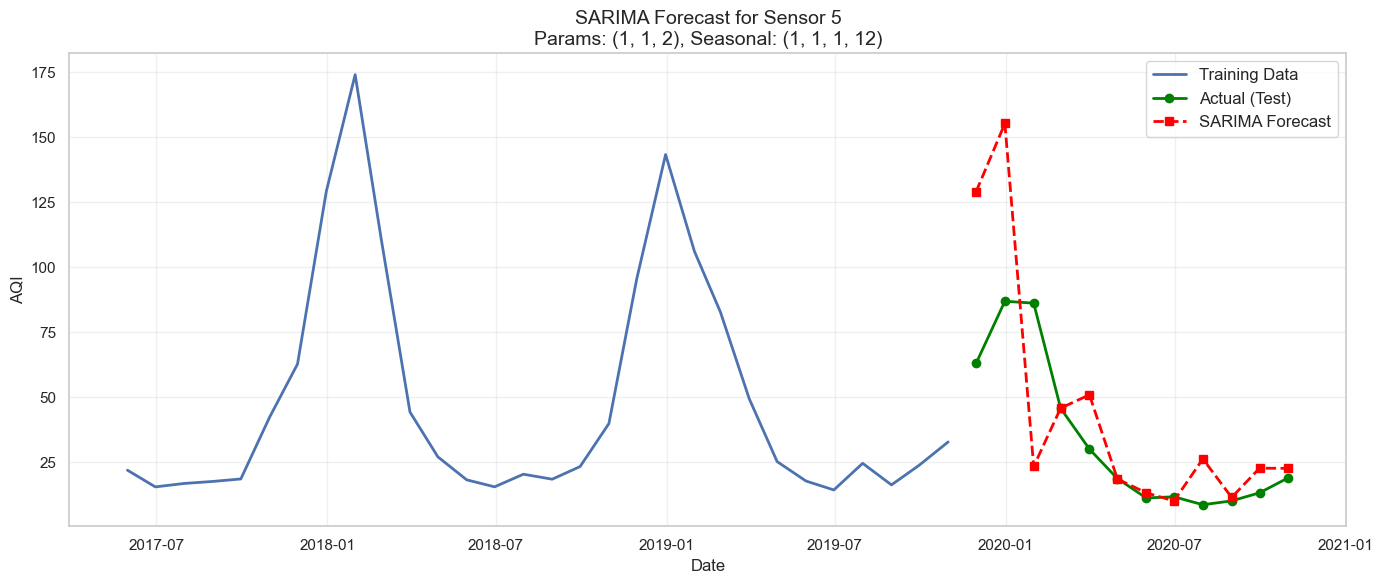


Processing Sensor: 6
Train data: 30 months
Test data: 12 months

Searching for best parameters (this may take a few minutes)...

✅ Best SARIMA parameters found:
   Order: (2, 0, 1)
   Seasonal: (0, 1, 1, 12)
   AIC: -19.32

📊 Model Performance:
   MAE:  12.87 AQI points
   RMSE: 15.56
   MAPE: 40.85%


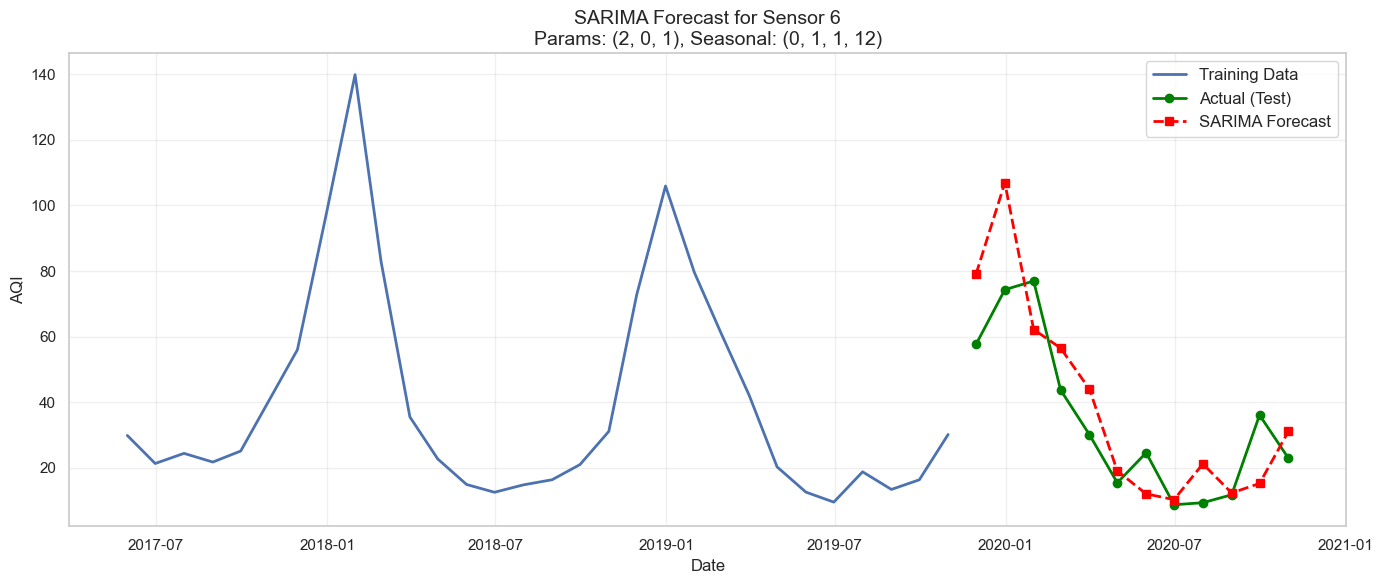


Processing Sensor: 9
Train data: 30 months
Test data: 12 months

Searching for best parameters (this may take a few minutes)...

✅ Best SARIMA parameters found:
   Order: (2, 1, 0)
   Seasonal: (1, 1, 0, 12)
   AIC: -34.45

📊 Model Performance:
   MAE:  14.49 AQI points
   RMSE: 20.33
   MAPE: 55.05%


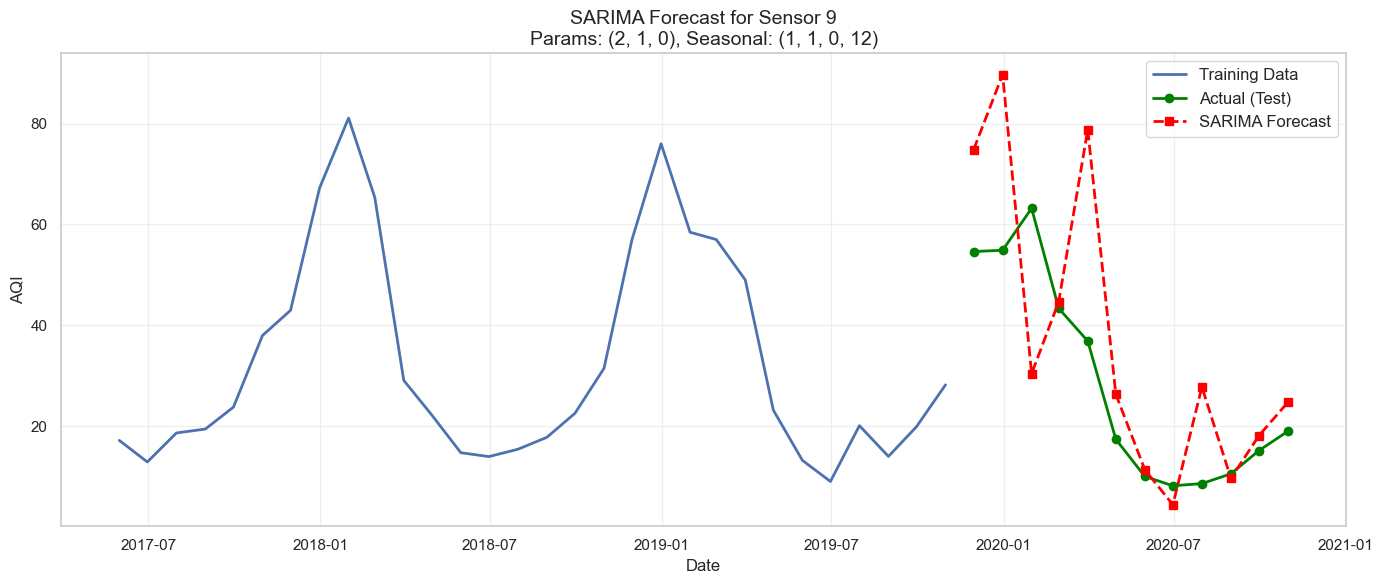


Processing Sensor: 12
Train data: 28 months
Test data: 12 months

Searching for best parameters (this may take a few minutes)...

✅ Best SARIMA parameters found:
   Order: (1, 1, 0)
   Seasonal: (1, 1, 0, 12)
   AIC: -29.88

📊 Model Performance:
   MAE:  512.66 AQI points
   RMSE: 875.58
   MAPE: 3271.74%


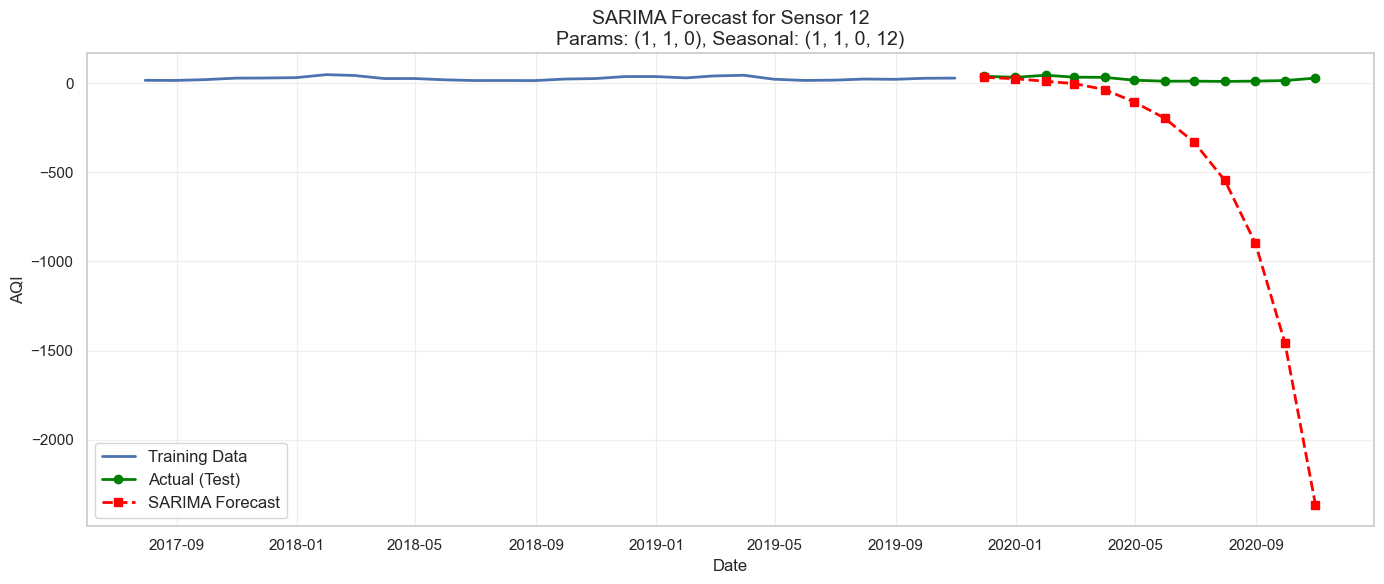


Finding best model for 2...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=150.088, Time=0.31 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=161.933, Time=0.00 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=166.872, Time=0.00 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=148.087, Time=0.14 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=162.811, Time=0.03 sec
 ARIMA(2,0,2)(2,1,0)[12] intercept   : AIC=150.096, Time=0.40 sec
 ARIMA(2,0,2)(2,1,1)[12] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,0,2)(1,1,0)[12] intercept   : AIC=147.205, Time=0.13 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(1,0,2)(2,1,0)[12] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=149.112, Time=0.17 sec
 ARIMA(1,0,2)(0,1,1)[12] int

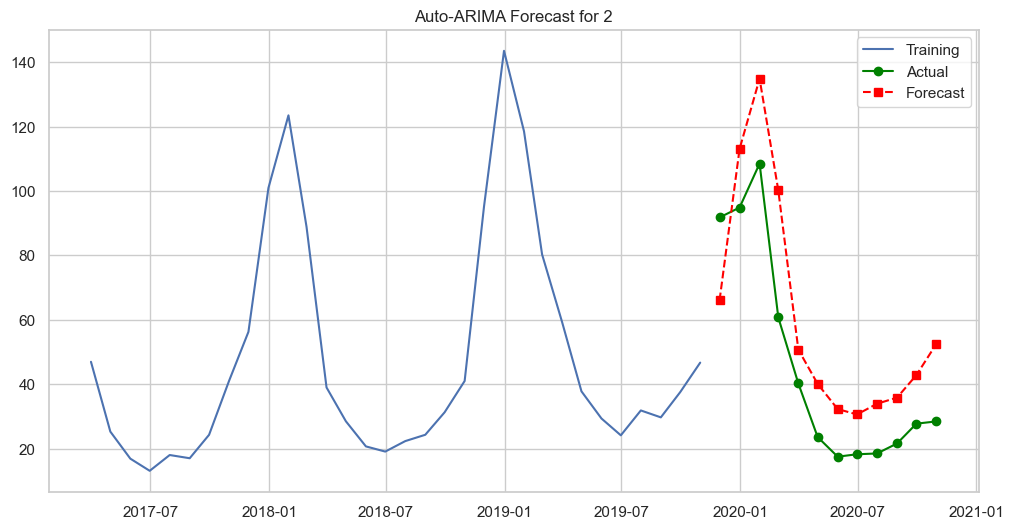


Finding best model for 5...


ValueError: All lag values up to 'maxlag' produced singular matrices. Consider using a longer series, a different lag term or a different test.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import itertools
import warnings
warnings.filterwarnings('ignore')

# Assuming you already have: df, stable_sensors defined

for sensor in stable_sensors:
    print(f"\n{'='*60}")
    print(f"Processing Sensor: {sensor}")
    print(f"{'='*60}")
    
    df_clean = df.dropna(subset=[sensor])
    df_resampled = df_clean[sensor].resample('ME').mean()
    
    # Split data
    train_data = df_resampled.iloc[:-12]
    test_data = df_resampled.iloc[-12:]
    
    print(f"Train data: {len(train_data)} months")
    print(f"Test data: {len(test_data)} months")
    
    # =================================================================
    # OPTION 1: Quick parameter search (takes a few minutes)
    # =================================================================
    
    # Define parameter ranges to test
    p_values = [0, 1, 2]
    d_values = [0, 1]
    q_values = [0, 1, 2]
    P_values = [0, 1]
    D_values = [1]  # Usually 1 for seasonal differencing
    Q_values = [0, 1]
    s = 12  # Monthly seasonality
    
    # Create all combinations
    pdq = list(itertools.product(p_values, d_values, q_values))
    seasonal_pdq = list(itertools.product(P_values, D_values, Q_values, [s]))
    
    best_aic = np.inf
    best_params = None
    best_seasonal = None
    
    print("\nSearching for best parameters (this may take a few minutes)...")
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                model = SARIMAX(train_data,
                               order=param,
                               seasonal_order=param_seasonal,
                               enforce_stationarity=False,
                               enforce_invertibility=False)
                
                results = model.fit(disp=False, maxiter=200)
                
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_params = param
                    best_seasonal = param_seasonal
                    
            except Exception as e:
                continue
    
    print(f"\n✅ Best SARIMA parameters found:")
    print(f"   Order: {best_params}")
    print(f"   Seasonal: {best_seasonal}")
    print(f"   AIC: {best_aic:.2f}")
    
    # =================================================================
    # Train final model with best parameters
    # =================================================================
    
    final_model = SARIMAX(train_data,
                         order=best_params,
                         seasonal_order=best_seasonal,
                         enforce_stationarity=False,
                         enforce_invertibility=False)
    
    final_results = final_model.fit(disp=False)
    
    # Forecast
    prediction = final_results.forecast(steps=12)
    prediction.index = test_data.index
    
    # Calculate errors
    mae = mean_absolute_error(test_data, prediction)
    rmse = np.sqrt(mean_squared_error(test_data, prediction))
    mape = np.mean(np.abs((test_data - prediction) / test_data)) * 100
    
    print(f"\n📊 Model Performance:")
    print(f"   MAE:  {mae:.2f} AQI points")
    print(f"   RMSE: {rmse:.2f}")
    print(f"   MAPE: {mape:.2f}%")
    
    # Plot
    plt.figure(figsize=(14, 6))
    plt.plot(train_data, label='Training Data', linewidth=2)
    plt.plot(test_data, label='Actual (Test)', color='green', linewidth=2, marker='o')
    plt.plot(prediction, label='SARIMA Forecast', color='red', linewidth=2, linestyle='--', marker='s')
    plt.legend(fontsize=12)
    plt.title(f'SARIMA Forecast for Sensor {sensor}\nParams: {best_params}, Seasonal: {best_seasonal}', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('AQI', fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


# =================================================================
# OPTION 2: If the grid search is too slow, use auto_arima (faster)
# =================================================================
# Uncomment this if you want to try auto_arima instead:

# First install: pip install pmdarima

from pmdarima import auto_arima

for sensor in stable_sensors:
    df_clean = df.dropna(subset=[sensor])
    df_resampled = df_clean[sensor].resample('ME').mean()
    
    train_data = df_resampled.iloc[:-12]
    test_data = df_resampled.iloc[-12:]
    
    print(f"\nFinding best model for {sensor}...")
    
    # Auto ARIMA will find the best parameters automatically
    auto_model = auto_arima(train_data,
                           seasonal=True,
                           m=12,  # monthly seasonality
                           stepwise=True,
                           suppress_warnings=True,
                           error_action='ignore',
                           trace=True)  # Set to True to see the search process
    
    print(f"\nBest model: {auto_model.order} x {auto_model.seasonal_order}")
    
    # Forecast
    prediction = auto_model.predict(n_periods=12)
    prediction = pd.Series(prediction, index=test_data.index)
    
    # Calculate errors
    mae = mean_absolute_error(test_data, prediction)
    rmse = np.sqrt(mean_squared_error(test_data, prediction))
    mape = np.mean(np.abs((test_data - prediction) / test_data)) * 100
    
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(train_data, label='Training')
    plt.plot(test_data, label='Actual', color='green', marker='o')
    plt.plot(prediction, label='Forecast', color='red', linestyle='--', marker='s')
    plt.legend()
    plt.title(f'Auto-ARIMA Forecast for {sensor}')
    plt.show()


DAILY PREDICTION FOR SENSOR: 2

Data: 1151 training days, 30 test days

[1/4] Training SARIMA (weekly seasonality)...
   ✅ SARIMA MAE: 7.21

[2/4] Training Exponential Smoothing...
   ✅ Exp Smoothing MAE: 7.73

[3/4] Creating Weekly Naive forecast...
   ✅ Weekly Naive MAE: 8.00

[4/4] Creating Moving Average forecast...
   ✅ Moving Average MAE: 16.17

📊 COMPARISON OF ALL METHODS:

SARIMA:
  MAE:  7.21
  RMSE: 9.01
  MAPE: 27.20%

Exp Smoothing:
  MAE:  7.73
  RMSE: 9.37
  MAPE: 29.04%

Weekly Naive:
  MAE:  8.00
  RMSE: 10.12
  MAPE: 29.91%

Moving Avg:
  MAE:  16.17
  RMSE: 18.52
  MAPE: 70.64%

🏆 WINNER: SARIMA (lowest MAE)


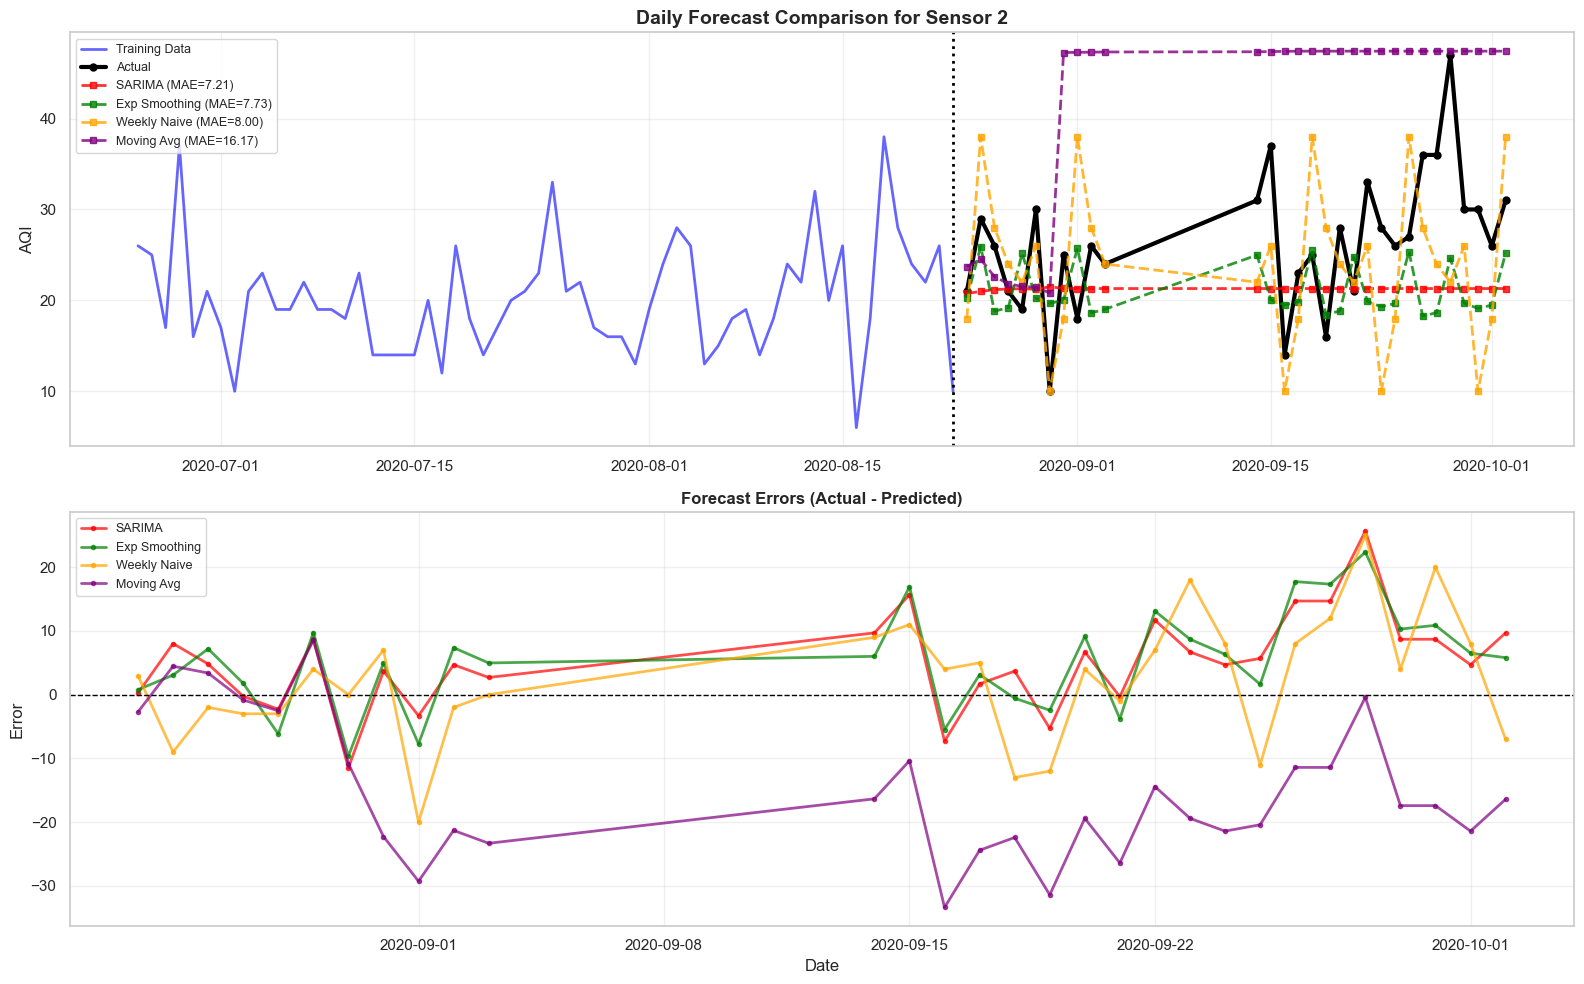




DAILY PREDICTION FOR SENSOR: 5

Data: 1160 training days, 30 test days

[1/4] Training SARIMA (weekly seasonality)...
   ✅ SARIMA MAE: 5.11

[2/4] Training Exponential Smoothing...
   ✅ Exp Smoothing MAE: 6.17

[3/4] Creating Weekly Naive forecast...
   ✅ Weekly Naive MAE: 5.93

[4/4] Creating Moving Average forecast...
   ✅ Moving Average MAE: 25.92

📊 COMPARISON OF ALL METHODS:

SARIMA:
  MAE:  5.11
  RMSE: 6.59
  MAPE: 31.92%

Exp Smoothing:
  MAE:  6.17
  RMSE: 7.46
  MAPE: 40.24%

Weekly Naive:
  MAE:  5.93
  RMSE: 7.46
  MAPE: 39.64%

Moving Avg:
  MAE:  25.92
  RMSE: 28.67
  MAPE: 223.84%

🏆 WINNER: SARIMA (lowest MAE)


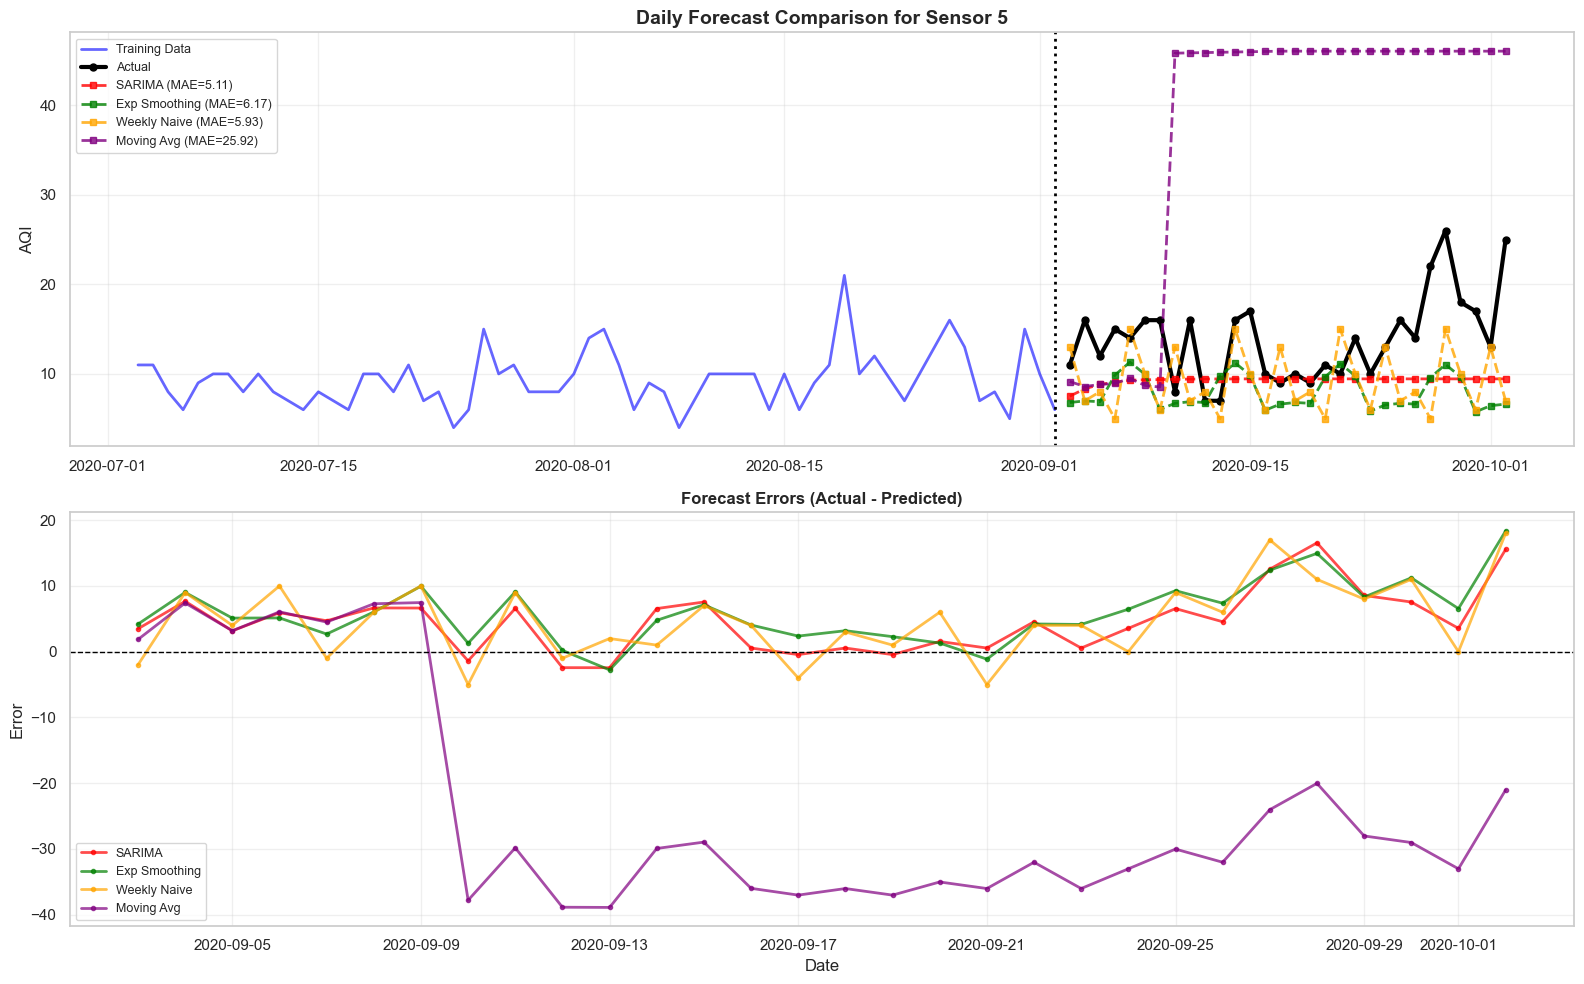




DAILY PREDICTION FOR SENSOR: 6

Data: 1189 training days, 30 test days

[1/4] Training SARIMA (weekly seasonality)...
   ✅ SARIMA MAE: 25.81

[2/4] Training Exponential Smoothing...
   ✅ Exp Smoothing MAE: 25.90

[3/4] Creating Weekly Naive forecast...
   ✅ Weekly Naive MAE: 26.40

[4/4] Creating Moving Average forecast...
   ✅ Moving Average MAE: 31.31

📊 COMPARISON OF ALL METHODS:

SARIMA:
  MAE:  25.81
  RMSE: 63.53
  MAPE: 43.57%

Exp Smoothing:
  MAE:  25.90
  RMSE: 64.18
  MAPE: 43.73%

Weekly Naive:
  MAE:  26.40
  RMSE: 63.84
  MAPE: 48.88%

Moving Avg:
  MAE:  31.31
  RMSE: 57.98
  MAPE: 111.33%

🏆 WINNER: SARIMA (lowest MAE)


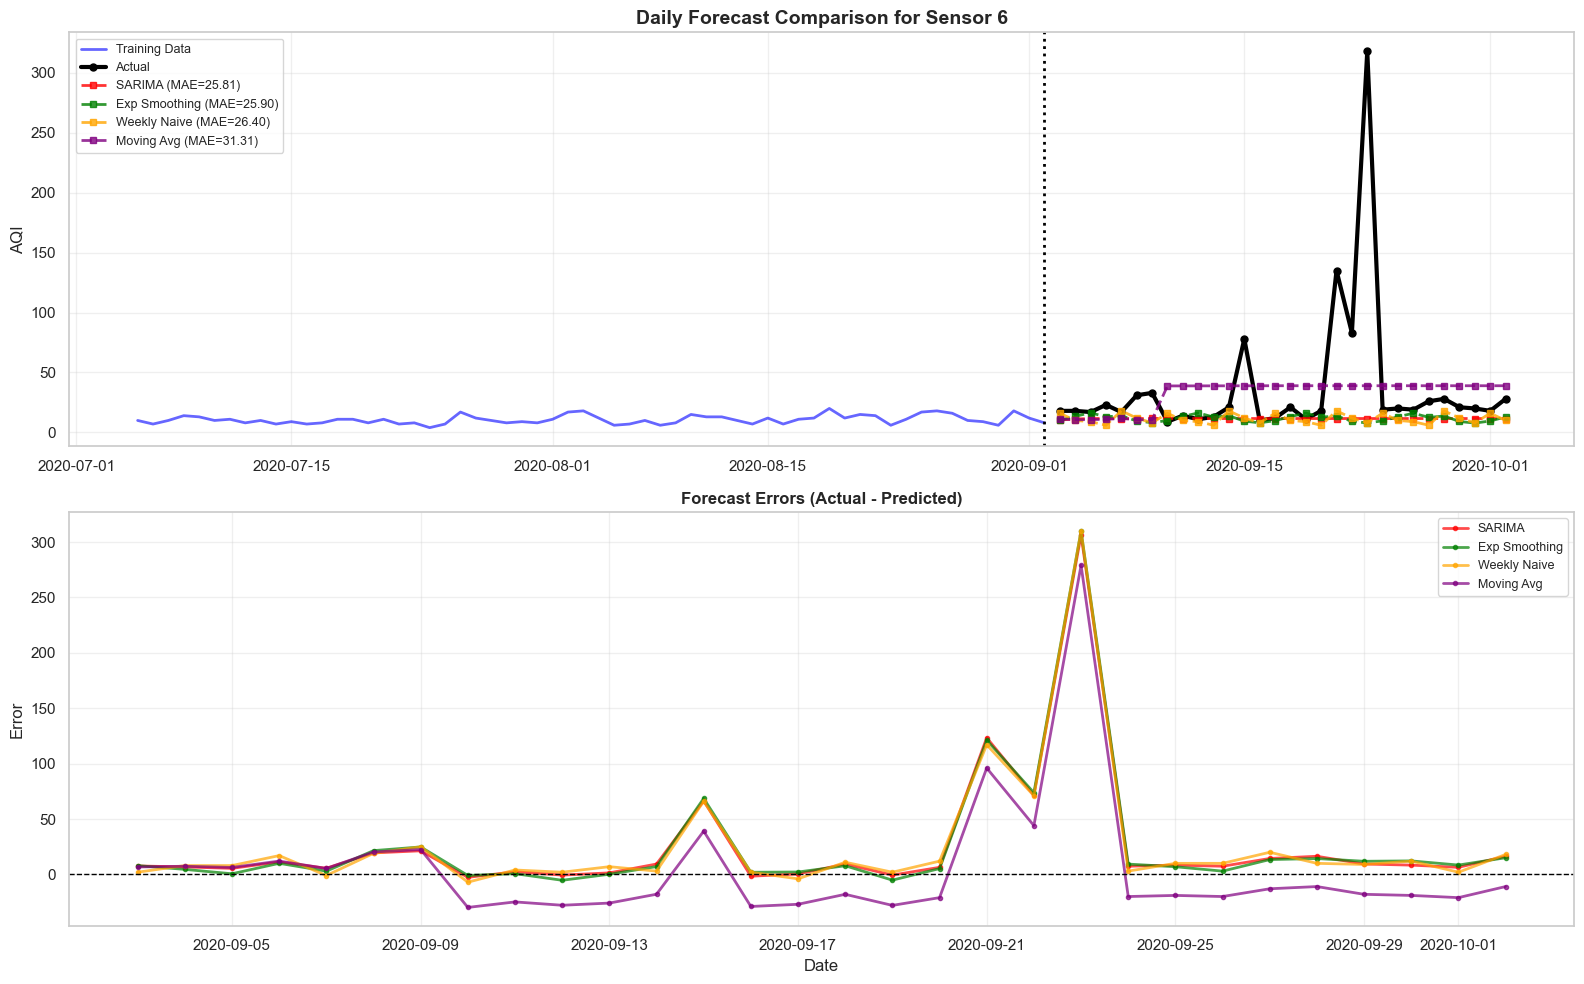




DAILY PREDICTION FOR SENSOR: 9

Data: 1145 training days, 30 test days

[1/4] Training SARIMA (weekly seasonality)...
   ✅ SARIMA MAE: 6.15

[2/4] Training Exponential Smoothing...
   ✅ Exp Smoothing MAE: 6.93

[3/4] Creating Weekly Naive forecast...
   ✅ Weekly Naive MAE: 6.77

[4/4] Creating Moving Average forecast...
   ✅ Moving Average MAE: 14.52

📊 COMPARISON OF ALL METHODS:

SARIMA:
  MAE:  6.15
  RMSE: 7.51
  MAPE: 33.96%

Exp Smoothing:
  MAE:  6.93
  RMSE: 8.44
  MAPE: 37.75%

Weekly Naive:
  MAE:  6.77
  RMSE: 8.48
  MAPE: 38.89%

Moving Avg:
  MAE:  14.52
  RMSE: 15.76
  MAPE: 114.93%

🏆 WINNER: SARIMA (lowest MAE)


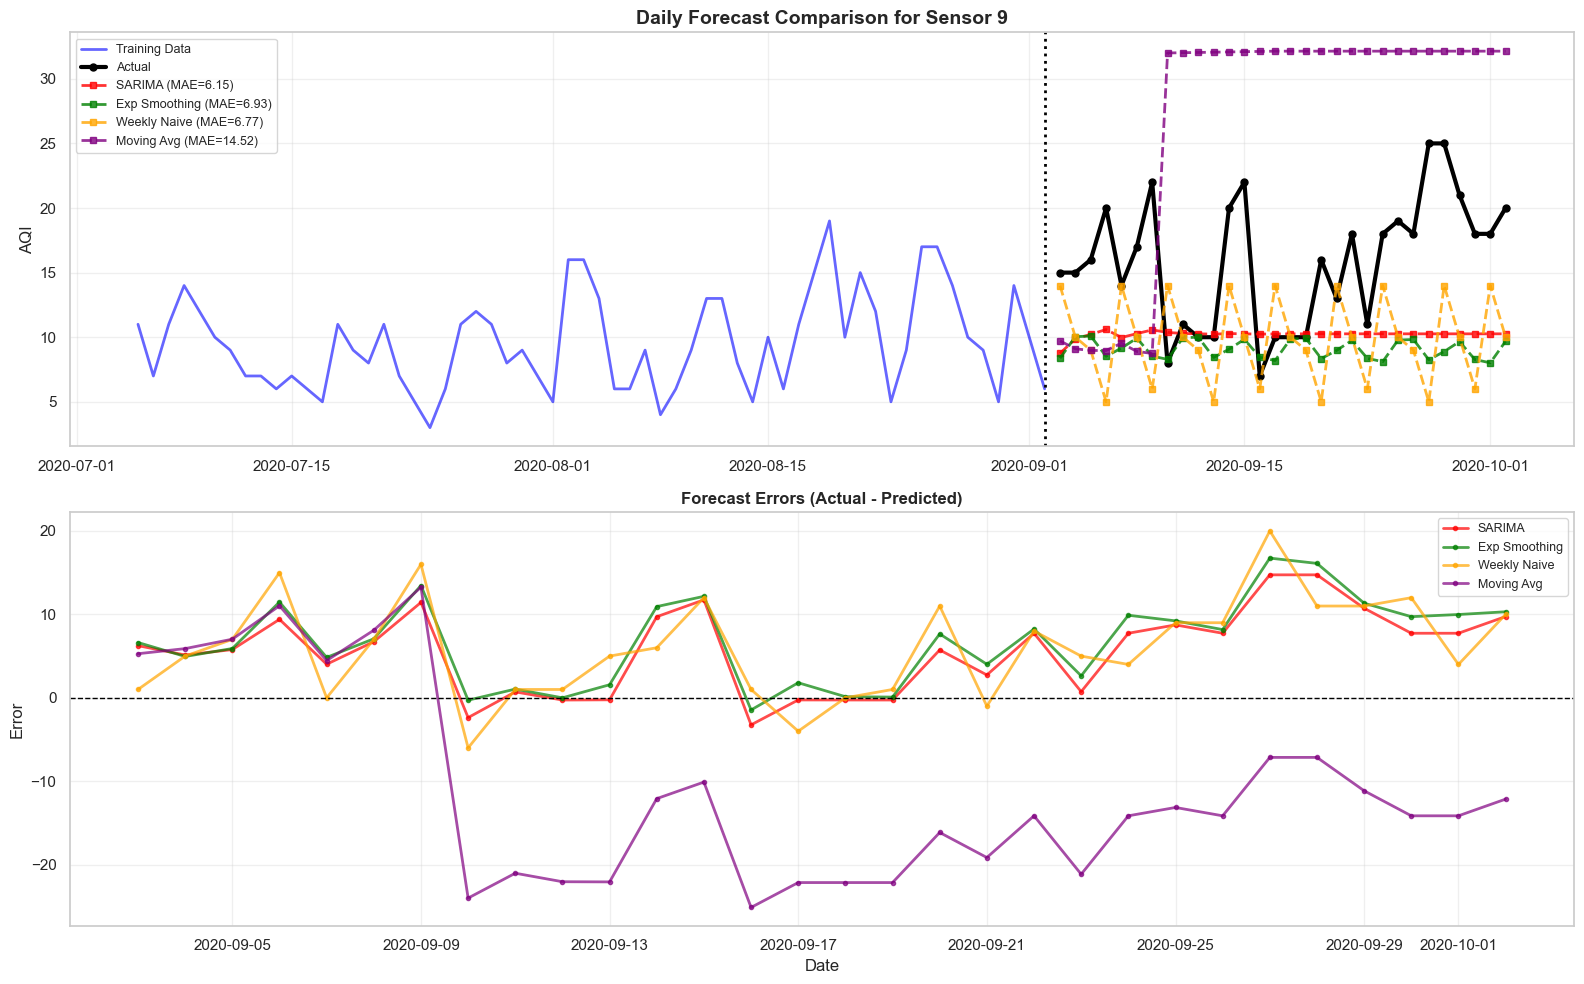




DAILY PREDICTION FOR SENSOR: 12

Data: 1139 training days, 30 test days

[1/4] Training SARIMA (weekly seasonality)...
   ✅ SARIMA MAE: 12.04

[2/4] Training Exponential Smoothing...
   ✅ Exp Smoothing MAE: 12.61

[3/4] Creating Weekly Naive forecast...
   ✅ Weekly Naive MAE: 12.80

[4/4] Creating Moving Average forecast...
   ✅ Moving Average MAE: 6.82

📊 COMPARISON OF ALL METHODS:

SARIMA:
  MAE:  12.04
  RMSE: 13.82
  MAPE: 121.14%

Exp Smoothing:
  MAE:  12.61
  RMSE: 15.95
  MAPE: 81.04%

Weekly Naive:
  MAE:  12.80
  RMSE: 16.53
  MAPE: 70.55%

Moving Avg:
  MAE:  6.82
  RMSE: 10.65
  MAPE: 205.57%

🏆 WINNER: Moving Avg (lowest MAE)


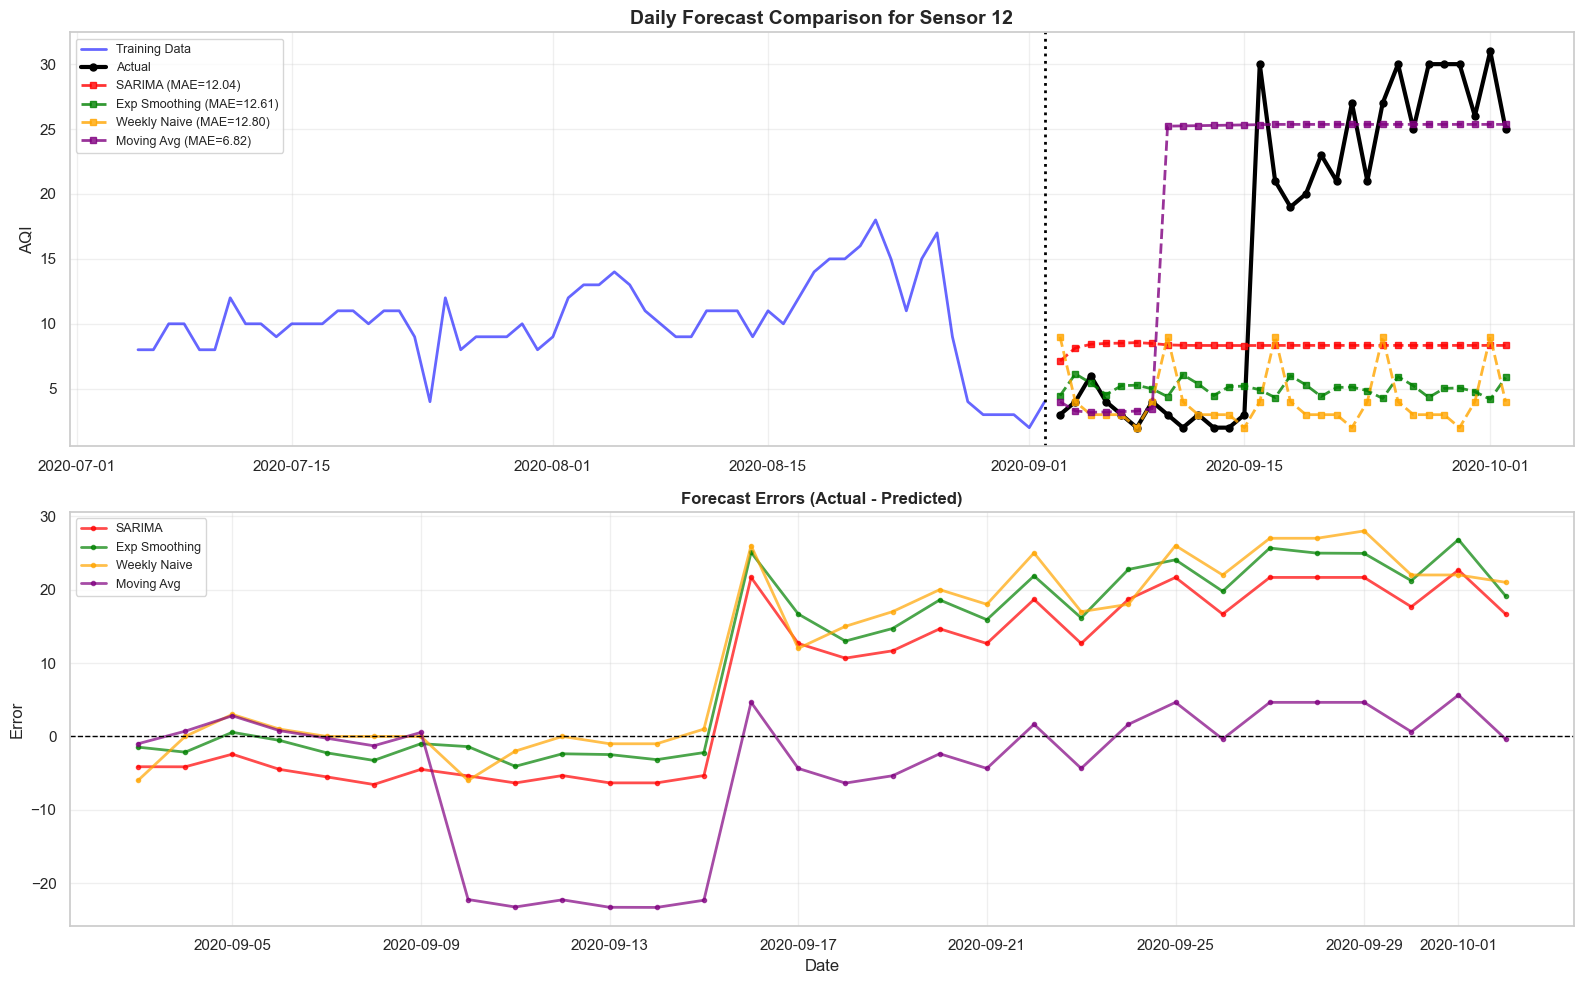




💡 RECOMMENDATIONS:

Based on the results:
1. If SARIMA won → Your data has clear patterns, use SARIMA
2. If Exponential Smoothing won → Your data has trend + seasonality
3. If Weekly Naive won → Strong weekly patterns, simple is better
4. If Moving Average won → Data is quite random, hard to predict

For production use, consider:
- Ensemble (average of top 2-3 methods)
- Re-train model every week with new data
- Use confidence intervals for predictions



In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

# =================================================================
# APPROACH: Compare multiple methods for daily prediction
# Sometimes simpler methods work better than SARIMA!
# =================================================================

for sensor in stable_sensors:
    print(f"\n{'='*70}")
    print(f"DAILY PREDICTION FOR SENSOR: {sensor}")
    print(f"{'='*70}")
    
    df_clean = df.dropna(subset=[sensor])
    daily_data = df_clean[sensor]
    
    # Split data
    test_days = 30
    train_data = daily_data.iloc[:-test_days]
    test_data = daily_data.iloc[-test_days:]
    
    print(f"\nData: {len(train_data)} training days, {len(test_data)} test days")
    
    results = {}
    
    # =================================================================
    # METHOD 1: Simple SARIMA (weekly seasonality)
    # =================================================================
    print("\n[1/4] Training SARIMA (weekly seasonality)...")
    try:
        sarima_model = SARIMAX(train_data,
                              order=(1, 1, 1),
                              seasonal_order=(1, 0, 0, 7),  # Weekly pattern
                              enforce_stationarity=False,
                              enforce_invertibility=False)
        sarima_fit = sarima_model.fit(disp=False, maxiter=100)
        sarima_pred = sarima_fit.forecast(steps=test_days)
        sarima_pred.index = test_data.index
        
        results['SARIMA'] = sarima_pred
        print(f"   ✅ SARIMA MAE: {mean_absolute_error(test_data, sarima_pred):.2f}")
    except Exception as e:
        print(f"   ❌ SARIMA failed: {str(e)[:50]}")
    
    # =================================================================
    # METHOD 2: Exponential Smoothing (captures trend + seasonality)
    # =================================================================
    print("\n[2/4] Training Exponential Smoothing...")
    try:
        exp_model = ExponentialSmoothing(train_data,
                                        seasonal_periods=7,
                                        trend='add',
                                        seasonal='add',
                                        use_boxcox=False)
        exp_fit = exp_model.fit(optimized=True)
        exp_pred = exp_fit.forecast(steps=test_days)
        exp_pred.index = test_data.index
        
        results['Exp Smoothing'] = exp_pred
        print(f"   ✅ Exp Smoothing MAE: {mean_absolute_error(test_data, exp_pred):.2f}")
    except Exception as e:
        print(f"   ❌ Exp Smoothing failed: {str(e)[:50]}")
    
    # =================================================================
    # METHOD 3: Weekly Naive (use same day from last week)
    # =================================================================
    print("\n[3/4] Creating Weekly Naive forecast...")
    weekly_naive = []
    for i in range(test_days):
        # Use the value from 7 days ago
        weekly_naive.append(train_data.iloc[-7 + (i % 7)])
    
    weekly_naive = pd.Series(weekly_naive, index=test_data.index)
    results['Weekly Naive'] = weekly_naive
    print(f"   ✅ Weekly Naive MAE: {mean_absolute_error(test_data, weekly_naive):.2f}")
    
    # =================================================================
    # METHOD 4: Simple Moving Average (last 7 days)
    # =================================================================
    print("\n[4/4] Creating Moving Average forecast...")
    ma_pred = []
    for i in range(test_days):
        if i == 0:
            # First prediction: use last 7 days of training
            ma_pred.append(train_data.iloc[-7:].mean())
        else:
            # Use last 7 predictions + remaining training data
            recent_values = list(train_data.iloc[-(7-min(i,7)):].values) + ma_pred[-min(i, 7):]
            ma_pred.append(np.mean(recent_values))
    
    ma_pred = pd.Series(ma_pred, index=test_data.index)
    results['Moving Avg'] = ma_pred
    print(f"   ✅ Moving Average MAE: {mean_absolute_error(test_data, ma_pred):.2f}")
    
    # =================================================================
    # Compare all methods
    # =================================================================
    print(f"\n{'='*70}")
    print("📊 COMPARISON OF ALL METHODS:")
    print(f"{'='*70}")
    
    comparison = {}
    for name, pred in results.items():
        mae = mean_absolute_error(test_data, pred)
        rmse = np.sqrt(mean_squared_error(test_data, pred))
        mape = np.mean(np.abs((test_data - pred) / test_data)) * 100
        
        comparison[name] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}
        print(f"\n{name}:")
        print(f"  MAE:  {mae:.2f}")
        print(f"  RMSE: {rmse:.2f}")
        print(f"  MAPE: {mape:.2f}%")
    
    # Find best method
    best_method = min(comparison.keys(), key=lambda x: comparison[x]['MAE'])
    print(f"\n🏆 WINNER: {best_method} (lowest MAE)")
    
    # =================================================================
    # Plot comparison
    # =================================================================
    fig, axes = plt.subplots(2, 1, figsize=(16, 10))
    
    # Top plot: Last 60 days of training + all predictions
    plot_start = max(0, len(train_data) - 60)
    
    axes[0].plot(train_data.iloc[plot_start:].index,
                train_data.iloc[plot_start:].values,
                label='Training Data', linewidth=2, color='blue', alpha=0.6)
    
    axes[0].plot(test_data.index, test_data.values,
                label='Actual', color='black', linewidth=3, marker='o', markersize=5)
    
    colors = ['red', 'green', 'orange', 'purple']
    for i, (name, pred) in enumerate(results.items()):
        axes[0].plot(pred.index, pred.values,
                    label=f'{name} (MAE={comparison[name]["MAE"]:.2f})',
                    linewidth=2, linestyle='--', marker='s', markersize=4,
                    color=colors[i % len(colors)], alpha=0.8)
    
    axes[0].axvline(train_data.index[-1], color='black', linestyle=':', linewidth=2)
    axes[0].legend(fontsize=9, loc='best')
    axes[0].set_title(f'Daily Forecast Comparison for Sensor {sensor}', 
                     fontsize=14, fontweight='bold')
    axes[0].set_ylabel('AQI', fontsize=12)
    axes[0].grid(alpha=0.3)
    
    # Bottom plot: Forecast errors over time
    for i, (name, pred) in enumerate(results.items()):
        errors = test_data - pred
        axes[1].plot(test_data.index, errors.values,
                    label=f'{name}', linewidth=2, marker='o', markersize=3,
                    color=colors[i % len(colors)], alpha=0.7)
    
    axes[1].axhline(0, color='black', linestyle='--', linewidth=1)
    axes[1].legend(fontsize=9)
    axes[1].set_title('Forecast Errors (Actual - Predicted)', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Date', fontsize=12)
    axes[1].set_ylabel('Error', fontsize=12)
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n{'='*70}\n")


# =================================================================
# SUMMARY RECOMMENDATION
# =================================================================
print("\n" + "="*70)
print("💡 RECOMMENDATIONS:")
print("="*70)
print("""
Based on the results:
1. If SARIMA won → Your data has clear patterns, use SARIMA
2. If Exponential Smoothing won → Your data has trend + seasonality
3. If Weekly Naive won → Strong weekly patterns, simple is better
4. If Moving Average won → Data is quite random, hard to predict

For production use, consider:
- Ensemble (average of top 2-3 methods)
- Re-train model every week with new data
- Use confidence intervals for predictions
""")
